<a href="https://colab.research.google.com/github/deepanshudaw/Adversarial-Attacks/blob/master/Boxed_Targeted_Attack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Idea

![alt text](https://drive.google.com/uc?authuser=0&id=1a62cHiH8MLYizC_RdF3cQrYatKbVffJO&export=download)

> Indented block



Importing uselful libraries

In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import time
import sys

In [0]:
mnist = keras.datasets.mnist

In [0]:
(train_images, train_label), (test_images, test_label) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


Scaling the data

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [0]:
breakdown_acc=0.7
distortion_list = [0,0.01,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.7,1]
model=[]
model.insert(0,"Deepanshu")

#Distorting

In [0]:
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
def colourmat(pred,test_label):
  cm = confusion_matrix(pred, test_label)
  np.set_printoptions(precision=2)
  print('Confusion matrix')
  print(cm)
  plt.figure()
  plot_confusion_matrix(cm,np.unique(test_label), title='Confusion matrix')
  plt.show()

In [0]:
def Hdistort(test,distortion,i):
  dist_test=np.empty([784])
  for j in range(784):
    dist_test[j]=test[i][j]
  s = np.random.choice(784, (int)(784*distortion),replace=False)
  for k in s:
    dist_test[k]=random.randint(0,254)/255
  return dist_test.reshape(1,28,28)

def create_dist(test_images,test_lbl,model_no, box = False):
  dist_test = np.empty([test_lbl.shape[0],28,28])
  acc = []
  
  test = np.empty([test_lbl.shape[0],28,28])
  for i in range(test_lbl.shape[0]):
    for j in range(28):
      for k in range(28):
        test[i][j][k]=test_images[i][j][k]
  test = test.reshape(test_lbl.shape[0],784)
  
  for j,distortion in enumerate(distortion_list):
    dist_test = np.empty([test_lbl.shape[0],28,28])
    
    if box:
      dist_test = boxdis(test_images,test_lbl,distortion)
    else: 
      for i in range(test_lbl.shape[0]):
        dist_test[i] = Hdistort(test,distortion,i)
    
    pred = np.argmax(model[model_no].predict(dist_test),axis=1)
    test_acc = accuracy_score(pred,test_lbl)
    acc.insert(j,test_acc)
    print("Distortion: ",distortion,"                  ","Accuracy:  ",test_acc)
    colourmat(pred,test_lbl)
    print()
    print("---------------------------------------------------------")
  if (acc[len(distortion_list)-1]<breakdown_acc):
    plotgraph(acc,distortion_list)
  else:
    print("Accuracy didn't fall below {}%".format(breakdown_acc*100))

In [0]:
def plotgraph(acc,distortion):
  plt.xlabel('Distortion')
  plt.ylabel('Accuracy')
  xs = acc
  ys = distortion_list
  for i in range(len(distortion_list)):
    if np.sign(breakdown_acc-acc[i])==1:
      cur = i
      prev = i-1
      break
  x = distortion_list[prev]+((acc[prev]-breakdown_acc)*(distortion_list[cur]-distortion_list[prev])/(acc[prev]-acc[cur]))
  print("Breakdown Distortion: ",x)
  plt.plot(ys,xs)
  plt.plot(x,breakdown_acc,'ro')
  plt.title("Variation of accuracy with distortion")
  plt.show

#Classification of circle vs non circle 

```
Model1
```



In [0]:
model1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(2, activation=tf.nn.softmax)
])


W0624 11:08:37.623143 140347531253632 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
model1.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
train_label_h1=np.empty([60000,])
for i in range(60000):
  if train_label[i]==1 or train_label[i]==2 or train_label[i]==3 or train_label[i]==4 or train_label[i]==5 or train_label[i]==7:    #||3||4||5||7
    train_label_h1[i]=0
  else:
    train_label_h1[i]=1
    
test_label_h1=np.empty([10000,])
for i in range(10000):
  if test_label[i]==1 or test_label[i]==2 or test_label[i]==3 or test_label[i]==4 or test_label[i]==5 or test_label[i]==7:    #||3||4||5||7
    test_label_h1[i]=0
  else:
    test_label_h1[i]=1

In [0]:
model1.fit(train_images, train_label_h1, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 5s 77us/sample - loss: 0.1234 - acc: 0.9546
Epoch 2/5
60000/60000 [==============================] - 4s 64us/sample - loss: 0.0562 - acc: 0.9811
Epoch 3/5
60000/60000 [==============================] - 4s 64us/sample - loss: 0.0397 - acc: 0.9866
Epoch 4/5
60000/60000 [==============================] - 4s 64us/sample - loss: 0.0308 - acc: 0.9894
Epoch 5/5
60000/60000 [==============================] - 4s 63us/sample - loss: 0.0228 - acc: 0.9921


In [0]:
test_loss, test_acc = model1.evaluate(test_images, test_label_h1)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 46us/sample - loss: 0.0441 - acc: 0.9846
Test accuracy: 0.9846


Distortion:  0                    Accuracy:   0.9846
Confusion matrix
[[5997   72]
 [  82 3849]]


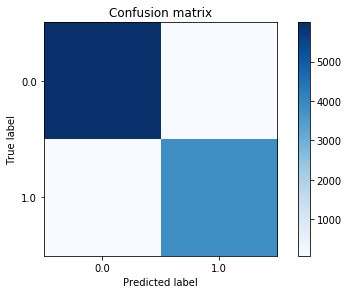


---------------------------------------------------------
Distortion:  0.01                    Accuracy:   0.9852
Confusion matrix
[[6007   76]
 [  72 3845]]


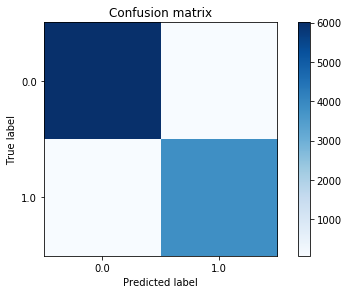


---------------------------------------------------------
Distortion:  0.05                    Accuracy:   0.972
Confusion matrix
[[5940  141]
 [ 139 3780]]


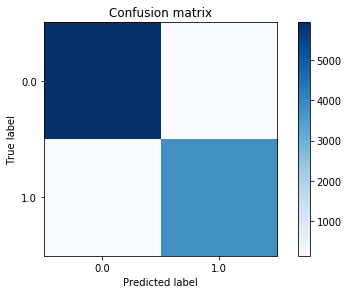


---------------------------------------------------------
Distortion:  0.1                    Accuracy:   0.9468
Confusion matrix
[[5825  278]
 [ 254 3643]]


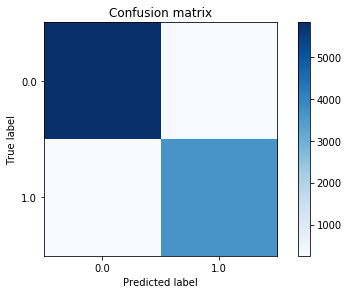


---------------------------------------------------------
Distortion:  0.15                    Accuracy:   0.9051
Confusion matrix
[[5654  524]
 [ 425 3397]]


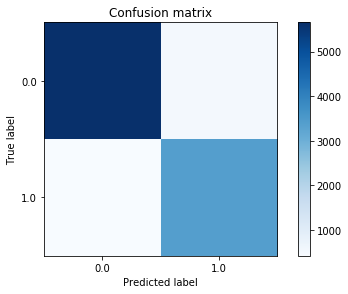


---------------------------------------------------------
Distortion:  0.2                    Accuracy:   0.8624
Confusion matrix
[[5529  826]
 [ 550 3095]]


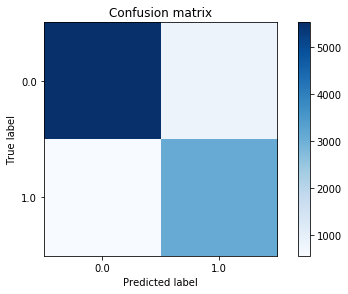


---------------------------------------------------------
Distortion:  0.25                    Accuracy:   0.8051
Confusion matrix
[[5408 1278]
 [ 671 2643]]


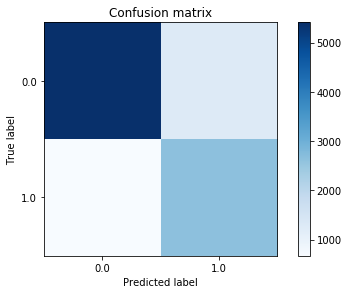


---------------------------------------------------------
Distortion:  0.3                    Accuracy:   0.7578
Confusion matrix
[[5394 1737]
 [ 685 2184]]


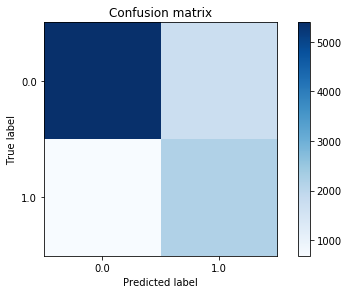


---------------------------------------------------------
Distortion:  0.35                    Accuracy:   0.7185
Confusion matrix
[[5432 2168]
 [ 647 1753]]


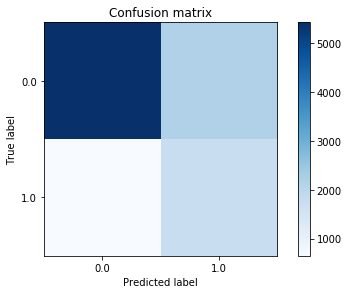


---------------------------------------------------------
Distortion:  0.4                    Accuracy:   0.6809
Confusion matrix
[[5499 2611]
 [ 580 1310]]


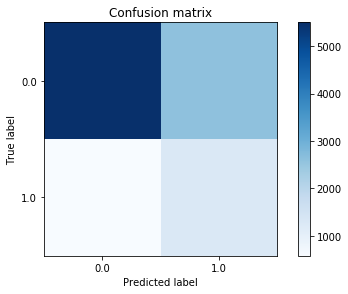


---------------------------------------------------------
Distortion:  0.7                    Accuracy:   0.6091
Confusion matrix
[[6059 3889]
 [  20   32]]


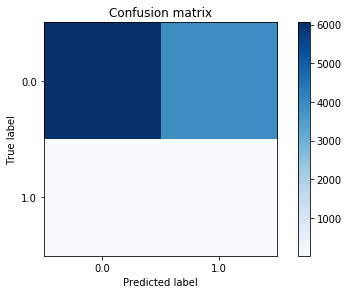


---------------------------------------------------------
Distortion:  1                    Accuracy:   0.6079
Confusion matrix
[[6079 3921]
 [   0    0]]


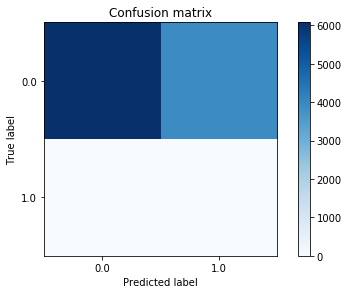


---------------------------------------------------------
Breakdown Distortion:  0.3746010638297873


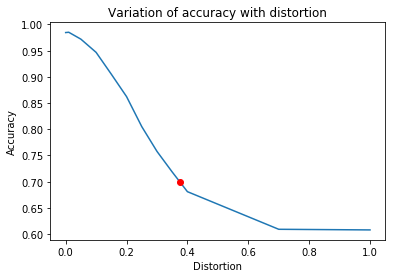

In [0]:
model.insert(1,model1)
create_dist(test_images,test_label_h1,1)

#Classification of 08 or 69

 *Model 2*



In [0]:
train_images_h2=np.empty([23641,28,28])
test_images_h2=np.empty([3921,28,28])
train_label_h2=np.empty([23641,])
test_label_h2=np.empty([3921,])

In [0]:
j=0
for i in range(60000):
  if train_label[i]==0 or train_label[i]==8:   
    train_label_h2[j]=0
    train_images_h2[j]=train_images[i]
    j=j+1
  elif train_label[i]==6 or train_label[i]==9:
    train_label_h2[j]=1
    train_images_h2[j]=train_images[i]
    j=j+1
print(j)    
j=0
for i in range(10000):
  if test_label[i]==0 or test_label[i]==8:   
    test_label_h2[j]=0
    test_images_h2[j]=test_images[i]
    j=j+1
  elif test_label[i]==6 or test_label[i]==9:
    test_label_h2[j]=1
    test_images_h2[j]=test_images[i]
    j=j+1
print(j)   

23641
3921


In [0]:
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(2, activation=tf.nn.softmax)
])
model2.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
model2.fit(train_images_h2, train_label_h2, epochs=5)

Epoch 1/5
23641/23641 [==============================] - 2s 67us/sample - loss: 0.0877 - acc: 0.9691
Epoch 2/5
23641/23641 [==============================] - 2s 65us/sample - loss: 0.0404 - acc: 0.9866
Epoch 3/5
23641/23641 [==============================] - 2s 65us/sample - loss: 0.0270 - acc: 0.9914
Epoch 4/5
23641/23641 [==============================] - 2s 64us/sample - loss: 0.0187 - acc: 0.9940
Epoch 5/5
23641/23641 [==============================] - 2s 64us/sample - loss: 0.0145 - acc: 0.9950


In [0]:
test_loss, test_acc = model2.evaluate(test_images_h2, test_label_h2)
print('Test accuracy:', test_acc)

3921/3921 [==============================] - 0s 49us/sample - loss: 0.0290 - acc: 0.9903
Test accuracy: 0.9903086


The distortion Testing:

Distortion:  0                    Accuracy:   0.9903085947462382
Confusion matrix
[[1942   26]
 [  12 1941]]


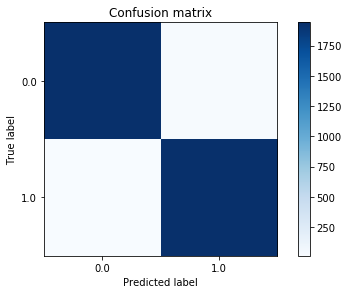


---------------------------------------------------------
Distortion:  0.01                    Accuracy:   0.9895434838051518
Confusion matrix
[[1939   26]
 [  15 1941]]


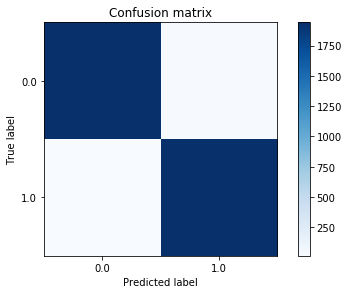


---------------------------------------------------------
Distortion:  0.05                    Accuracy:   0.9836776332568222
Confusion matrix
[[1918   28]
 [  36 1939]]


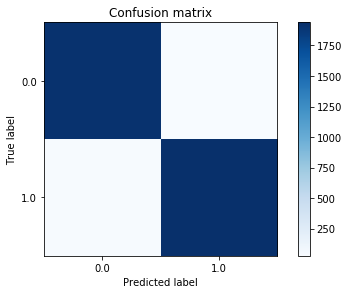


---------------------------------------------------------
Distortion:  0.1                    Accuracy:   0.9706707472583525
Confusion matrix
[[1857   18]
 [  97 1949]]


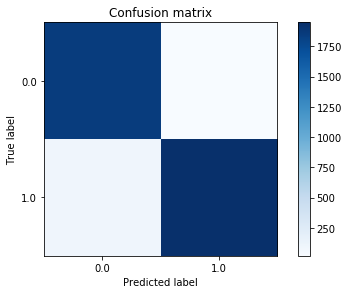


---------------------------------------------------------
Distortion:  0.15                    Accuracy:   0.9472073450650345
Confusion matrix
[[1760   13]
 [ 194 1954]]


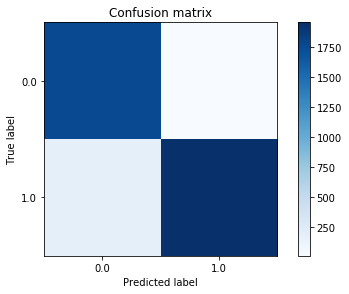


---------------------------------------------------------
Distortion:  0.2                    Accuracy:   0.8933945422086202
Confusion matrix
[[1548   12]
 [ 406 1955]]


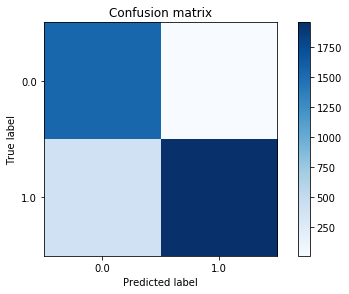


---------------------------------------------------------
Distortion:  0.25                    Accuracy:   0.8380515174700331
Confusion matrix
[[1329   10]
 [ 625 1957]]


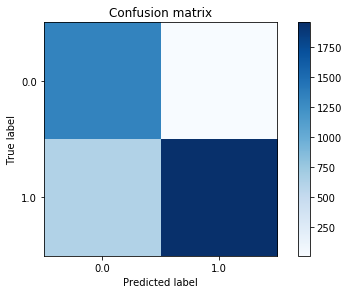


---------------------------------------------------------
Distortion:  0.3                    Accuracy:   0.7722519765365978
Confusion matrix
[[1064    3]
 [ 890 1964]]


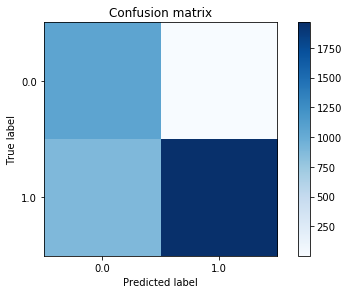


---------------------------------------------------------
Distortion:  0.35                    Accuracy:   0.690640142820709
Confusion matrix
[[ 752   11]
 [1202 1956]]


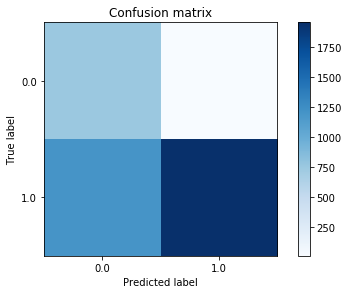


---------------------------------------------------------
Distortion:  0.4                    Accuracy:   0.6309614894159653
Confusion matrix
[[ 508    1]
 [1446 1966]]


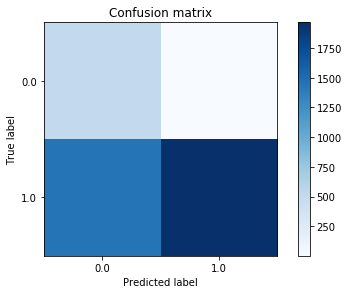


---------------------------------------------------------
Distortion:  0.7                    Accuracy:   0.5019127773527161
Confusion matrix
[[   1    0]
 [1953 1967]]


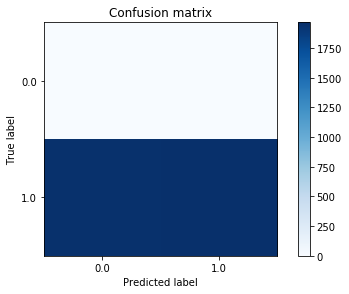


---------------------------------------------------------
Distortion:  1                    Accuracy:   0.501657740372354
Confusion matrix
[[   0    0]
 [1954 1967]]


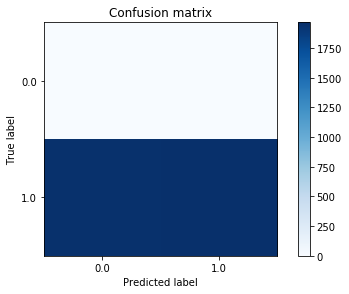


---------------------------------------------------------
Breakdown Distortion:  0.34426562499999996


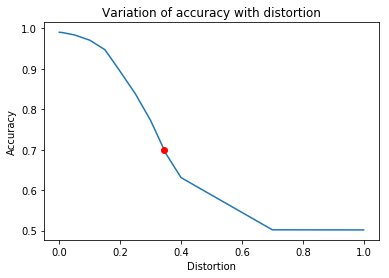

In [0]:
model.insert(2,model2)
create_dist(test_images_h2,test_label_h2,2)

#Classification of 8 and 0
*Model 3*

In [0]:
train_images_h3=np.empty([11774,28,28])
test_images_h3=np.empty([1954,28,28])
train_label_h3=np.empty([11774,])
test_label_h3=np.empty([1954,])

In [0]:
j=0
for i in range(60000):
  if train_label[i]==0:
    train_label_h3[j]=0
    train_images_h3[j]=train_images[i]
    j=j+1
  elif train_label[i]==8:
    train_label_h3[j]=1
    train_images_h3[j]=train_images[i]
    j=j+1
print(j)    
j=0
for i in range(10000):
  if test_label[i]==0:   
    test_label_h3[j]=0
    test_images_h3[j]=test_images[i]
    j=j+1
  elif test_label[i]==8:
    test_label_h3[j]=1
    test_images_h3[j]=test_images[i]
    j=j+1
print(j)   

11774
1954


In [0]:
model3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(2, activation=tf.nn.softmax)
])
model3.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
model3.fit(train_images_h3, train_label_h3, epochs=5)

Epoch 1/5
11774/11774 [==============================] - 1s 69us/sample - loss: 0.0413 - acc: 0.9865
Epoch 2/5
11774/11774 [==============================] - 1s 66us/sample - loss: 0.0164 - acc: 0.9949
Epoch 3/5
11774/11774 [==============================] - 1s 66us/sample - loss: 0.0103 - acc: 0.9969
Epoch 4/5
11774/11774 [==============================] - 1s 65us/sample - loss: 0.0070 - acc: 0.9972
Epoch 5/5
11774/11774 [==============================] - 1s 65us/sample - loss: 0.0052 - acc: 0.9983


In [0]:
test_loss, test_acc = model3.evaluate(test_images_h3, test_label_h3)
print('Test accuracy:', test_acc)

1954/1954 [==============================] - 0s 55us/sample - loss: 0.0141 - acc: 0.9949
Test accuracy: 0.9948823


Distortion:  0                    Accuracy:   0.9948822927328557
Confusion matrix
[[976   6]
 [  4 968]]


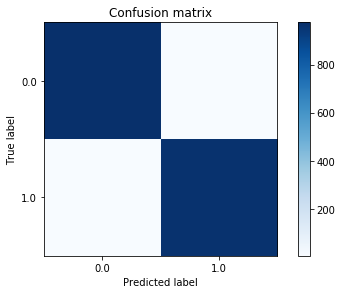


---------------------------------------------------------
Distortion:  0.01                    Accuracy:   0.9948822927328557
Confusion matrix
[[976   6]
 [  4 968]]


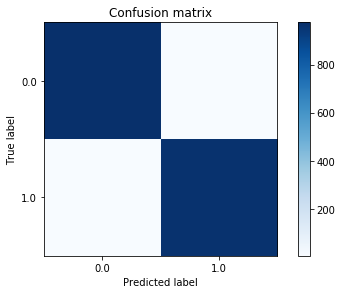


---------------------------------------------------------
Distortion:  0.05                    Accuracy:   0.9953940634595702
Confusion matrix
[[976   5]
 [  4 969]]


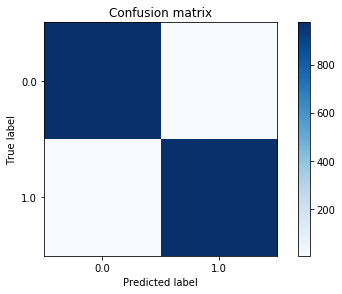


---------------------------------------------------------
Distortion:  0.1                    Accuracy:   0.9948822927328557
Confusion matrix
[[975   5]
 [  5 969]]


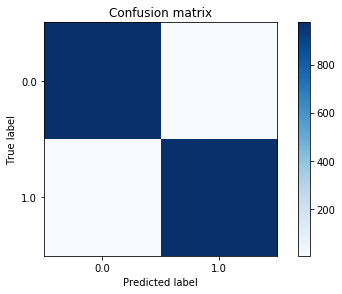


---------------------------------------------------------
Distortion:  0.15                    Accuracy:   0.9938587512794268
Confusion matrix
[[970   2]
 [ 10 972]]


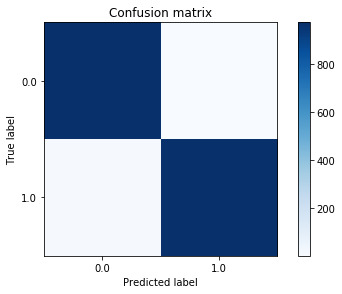


---------------------------------------------------------
Distortion:  0.2                    Accuracy:   0.9907881269191402
Confusion matrix
[[964   2]
 [ 16 972]]


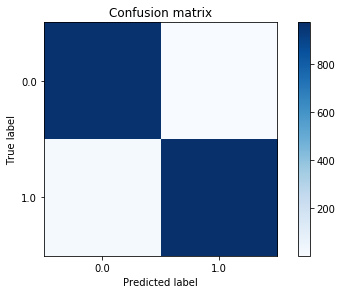


---------------------------------------------------------
Distortion:  0.25                    Accuracy:   0.9805527123848515
Confusion matrix
[[944   2]
 [ 36 972]]


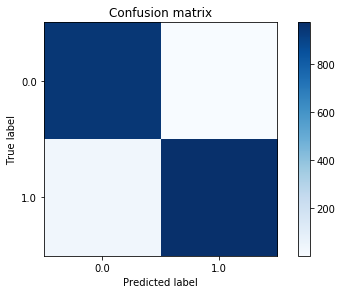


---------------------------------------------------------
Distortion:  0.3                    Accuracy:   0.9672466734902764
Confusion matrix
[[916   0]
 [ 64 974]]


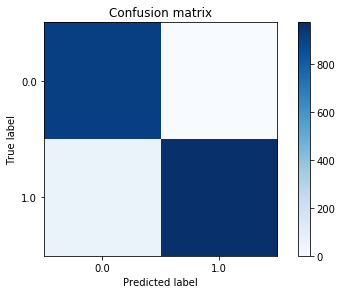


---------------------------------------------------------
Distortion:  0.35                    Accuracy:   0.9390992835209826
Confusion matrix
[[862   1]
 [118 973]]


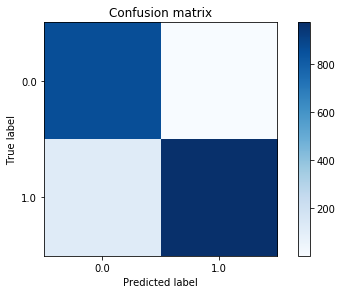


---------------------------------------------------------
Distortion:  0.4                    Accuracy:   0.9027635619242579
Confusion matrix
[[792   2]
 [188 972]]


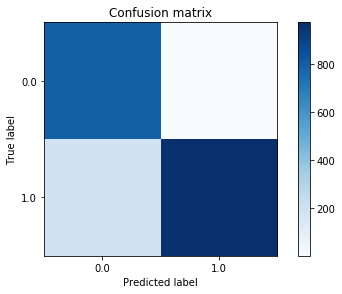


---------------------------------------------------------
Distortion:  0.7                    Accuracy:   0.5598771750255885
Confusion matrix
[[120   0]
 [860 974]]


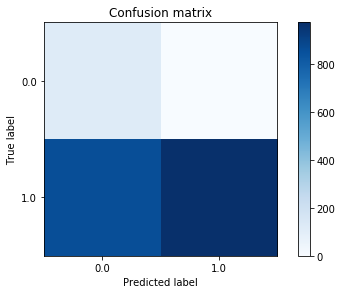


---------------------------------------------------------
Distortion:  1                    Accuracy:   0.4984646878198567
Confusion matrix
[[  0   0]
 [980 974]]


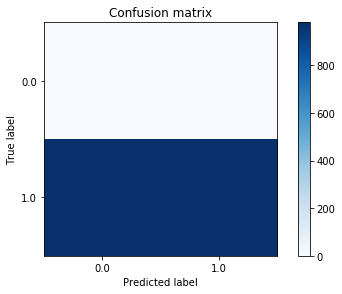


---------------------------------------------------------
Breakdown Distortion:  0.5774029850746268


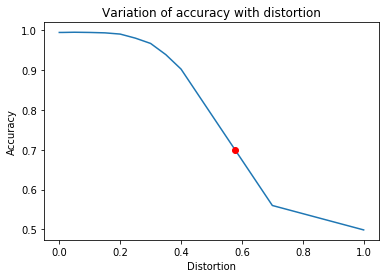

In [0]:
model.insert(3,model3)
create_dist(test_images_h3,test_label_h3,3)

# Classification of 6 and 9
*Model 4*

In [0]:
train_images_h4=np.empty([11867,28,28])
test_images_h4=np.empty([1967,28,28])
train_label_h4=np.empty([11867,])
test_label_h4=np.empty([1967,])

In [0]:
j=0
for i in range(60000):
  if train_label[i]==6:   
    train_label_h4[j]=0
    train_images_h4[j]=train_images[i]
    j=j+1
  elif train_label[i]==9:
    train_label_h4[j]=1
    train_images_h4[j]=train_images[i]
    j=j+1
print(j)    
j=0
for i in range(10000):
  if test_label[i]==6:   
    test_label_h4[j]=0
    test_images_h4[j]=test_images[i]
    j=j+1
  elif test_label[i]==9:
    test_label_h4[j]=1
    test_images_h4[j]=test_images[i]
    j=j+1
print(j)   

11867
1967


In [0]:
model4 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(2, activation=tf.nn.softmax)
])
model4.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
model4.fit(train_images_h4, train_label_h4, epochs=5)

Epoch 1/5
11867/11867 [==============================] - 1s 70us/sample - loss: 0.0189 - acc: 0.9945
Epoch 2/5
11867/11867 [==============================] - 1s 66us/sample - loss: 0.0045 - acc: 0.9987
Epoch 3/5
11867/11867 [==============================] - 1s 67us/sample - loss: 0.0021 - acc: 0.9992
Epoch 4/5
11867/11867 [==============================] - 1s 66us/sample - loss: 0.0014 - acc: 0.9997
Epoch 5/5
11867/11867 [==============================] - 1s 65us/sample - loss: 3.7017e-04 - acc: 1.0000


In [0]:
test_loss, test_acc = model4.evaluate(test_images_h4, test_label_h4)
print('Test accuracy:', test_acc)

1967/1967 [==============================] - 0s 63us/sample - loss: 0.0062 - acc: 0.9975
Test accuracy: 0.99745804


Distortion:  0                    Accuracy:   0.9974580579562786
Confusion matrix
[[ 955    2]
 [   3 1007]]


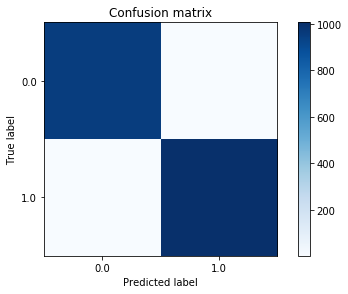


---------------------------------------------------------
Distortion:  0.01                    Accuracy:   0.9979664463650229
Confusion matrix
[[ 956    2]
 [   2 1007]]


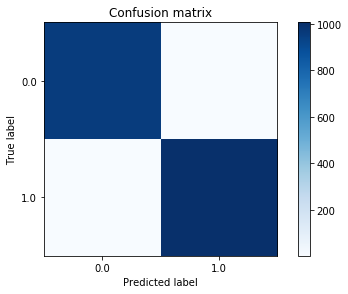


---------------------------------------------------------
Distortion:  0.05                    Accuracy:   0.9969496695475343
Confusion matrix
[[ 954    2]
 [   4 1007]]


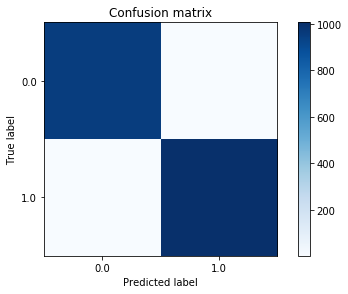


---------------------------------------------------------
Distortion:  0.1                    Accuracy:   0.99644128113879
Confusion matrix
[[ 956    5]
 [   2 1004]]


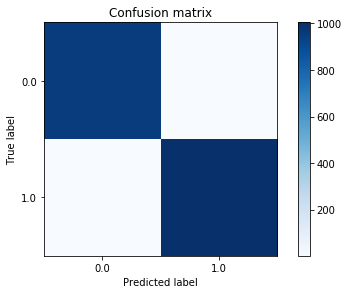


---------------------------------------------------------
Distortion:  0.15                    Accuracy:   0.99644128113879
Confusion matrix
[[ 954    3]
 [   4 1006]]


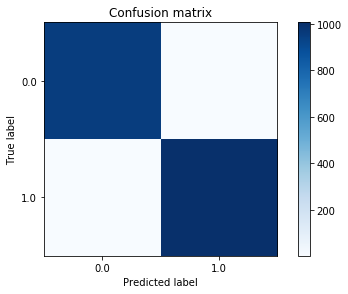


---------------------------------------------------------
Distortion:  0.2                    Accuracy:   0.9903406202338587
Confusion matrix
[[952  13]
 [  6 996]]


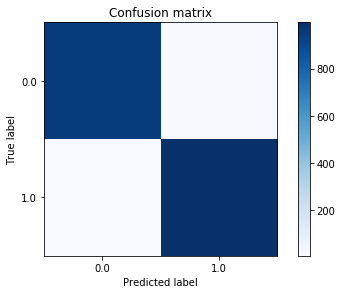


---------------------------------------------------------
Distortion:  0.25                    Accuracy:   0.9898322318251144
Confusion matrix
[[952  14]
 [  6 995]]


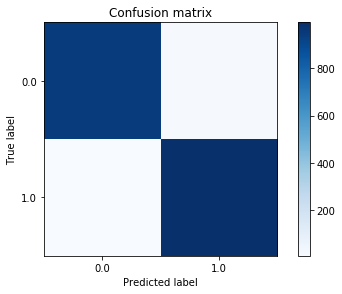


---------------------------------------------------------
Distortion:  0.3                    Accuracy:   0.9842399593289273
Confusion matrix
[[952  25]
 [  6 984]]


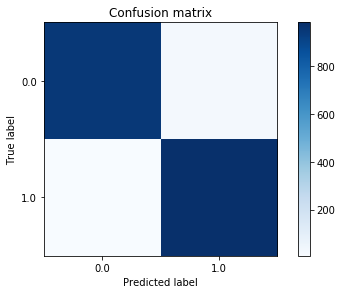


---------------------------------------------------------
Distortion:  0.35                    Accuracy:   0.9669547534316217
Confusion matrix
[[946  53]
 [ 12 956]]


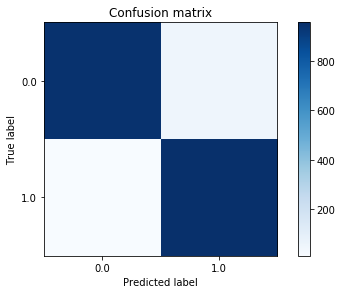


---------------------------------------------------------
Distortion:  0.4                    Accuracy:   0.9628876461616676
Confusion matrix
[[940  55]
 [ 18 954]]


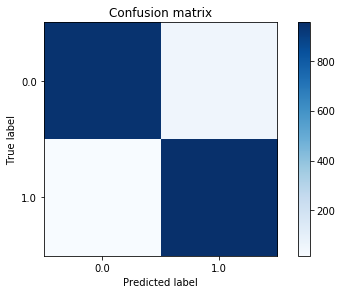


---------------------------------------------------------
Distortion:  0.7                    Accuracy:   0.784443314692425
Confusion matrix
[[900 366]
 [ 58 643]]


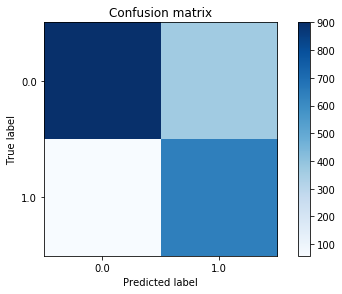


---------------------------------------------------------
Distortion:  1                    Accuracy:   0.4992374173868836
Confusion matrix
[[767 794]
 [191 215]]


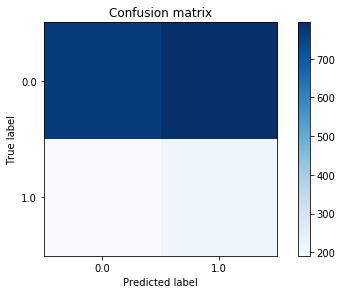


---------------------------------------------------------
Breakdown Distortion:  0.7888235294117647


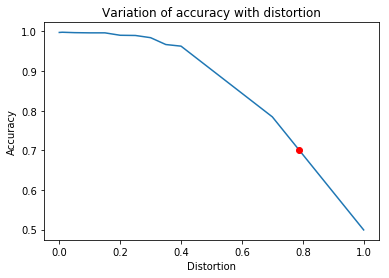

In [0]:
model.insert(4,model4)
create_dist(test_images_h4,test_label_h4,4)

# Classification of 147 and 235
*Model 5*

In [0]:
train_no=36359
test_no=6079
train_images_h5=np.empty([train_no,28,28])
test_images_h5=np.empty([test_no,28,28])
train_label_h5=np.empty([train_no,])
test_label_h5=np.empty([test_no,])

In [0]:
j=0
for i in range(60000):
  if train_label[i]==1 or train_label[i]==4 or train_label[i]==7:   
    train_label_h5[j]=0
    train_images_h5[j]=train_images[i]
    j=j+1
  elif train_label[i]==2 or train_label[i]==3 or train_label[i]==5:
    train_label_h5[j]=1
    train_images_h5[j]=train_images[i]
    j=j+1
print(j)    
j=0
for i in range(10000):
  if test_label[i]==1 or test_label[i]==4 or test_label[i]==7:   
    test_label_h5[j]=0
    test_images_h5[j]=test_images[i]
    j=j+1
  elif test_label[i]==2 or test_label[i]==3 or test_label[i]==5:
    test_label_h5[j]=1
    test_images_h5[j]=test_images[i]
    j=j+1
print(j)   

36359
6079


In [0]:
model5 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(2, activation=tf.nn.softmax)
])
model5.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
model5.fit(train_images_h5, train_label_h5, epochs=5)

Epoch 1/5
36359/36359 [==============================] - 2s 67us/sample - loss: 0.0598 - acc: 0.9816
Epoch 2/5
36359/36359 [==============================] - 2s 66us/sample - loss: 0.0229 - acc: 0.9926
Epoch 3/5
36359/36359 [==============================] - 2s 65us/sample - loss: 0.0136 - acc: 0.9957
Epoch 4/5
36359/36359 [==============================] - 2s 65us/sample - loss: 0.0097 - acc: 0.9967
Epoch 5/5
36359/36359 [==============================] - 2s 66us/sample - loss: 0.0062 - acc: 0.9980


In [0]:
test_loss, test_acc = model5.evaluate(test_images_h5, test_label_h5)
print('Test accuracy:', test_acc)

6079/6079 [==============================] - 0s 51us/sample - loss: 0.0272 - acc: 0.9924
Test accuracy: 0.99243295


In [0]:
model5.predict(test_images_h5).shape

(6079, 2)

Distortion:  0                    Accuracy:   0.9924329659483467
Confusion matrix
[[3119   20]
 [  26 2914]]


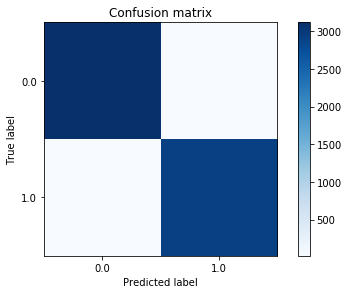


---------------------------------------------------------
Distortion:  0.01                    Accuracy:   0.9917749629873335
Confusion matrix
[[3114   19]
 [  31 2915]]


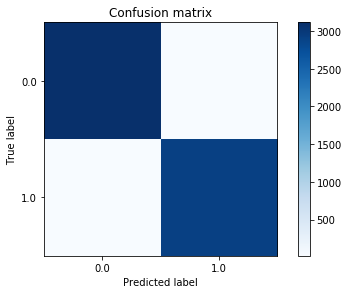


---------------------------------------------------------
Distortion:  0.05                    Accuracy:   0.9791084059878269
Confusion matrix
[[3031   13]
 [ 114 2921]]


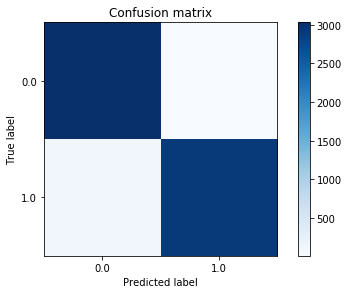


---------------------------------------------------------
Distortion:  0.1                    Accuracy:   0.9119921039644678
Confusion matrix
[[2620   10]
 [ 525 2924]]


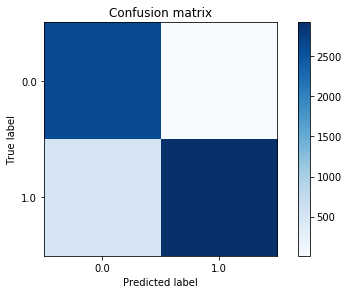


---------------------------------------------------------
Distortion:  0.15                    Accuracy:   0.8058891265010693
Confusion matrix
[[1977   12]
 [1168 2922]]


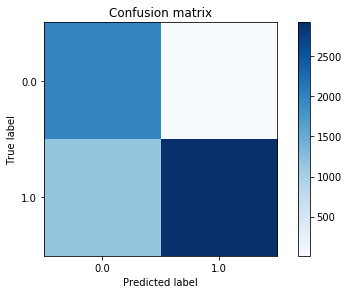


---------------------------------------------------------
Distortion:  0.2                    Accuracy:   0.7190327356473104
Confusion matrix
[[1444    7]
 [1701 2927]]


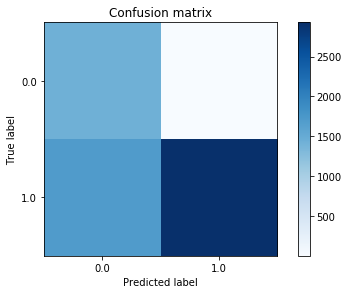


---------------------------------------------------------
Distortion:  0.25                    Accuracy:   0.6555354499095246
Confusion matrix
[[1058    7]
 [2087 2927]]


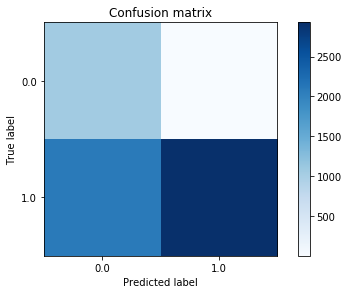


---------------------------------------------------------
Distortion:  0.3                    Accuracy:   0.6099687448593518
Confusion matrix
[[ 782    8]
 [2363 2926]]


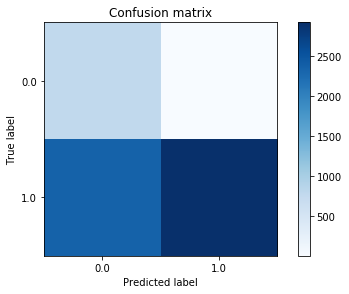


---------------------------------------------------------
Distortion:  0.35                    Accuracy:   0.5749300871853923
Confusion matrix
[[ 567    6]
 [2578 2928]]


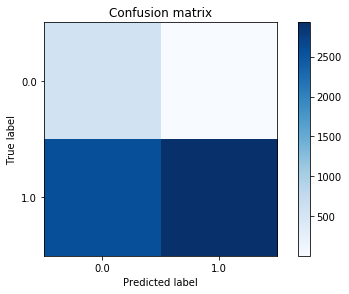


---------------------------------------------------------
Distortion:  0.4                    Accuracy:   0.5468004606020727
Confusion matrix
[[ 399    9]
 [2746 2925]]


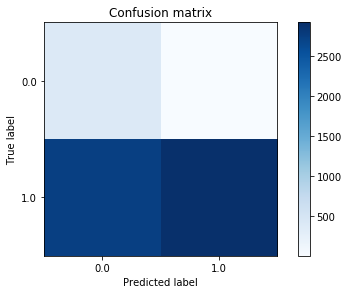


---------------------------------------------------------
Distortion:  0.7                    Accuracy:   0.48412567856555355
Confusion matrix
[[  11    2]
 [3134 2932]]


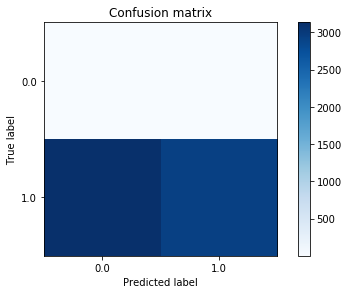


---------------------------------------------------------
Distortion:  1                    Accuracy:   0.48264517190327355
Confusion matrix
[[   0    0]
 [3145 2934]]


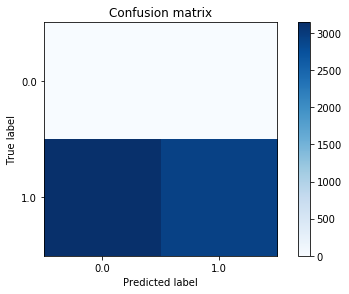


---------------------------------------------------------
Breakdown Distortion:  0.2149870466321244


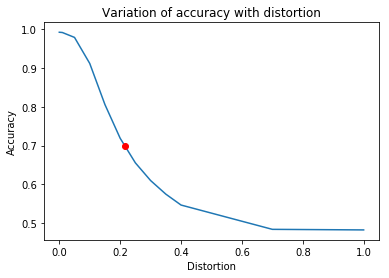

In [0]:
model.insert(5,model5)
create_dist(test_images_h5,test_label_h5,5)

#Multiclass of 147
*Model 6*

In [0]:
train_no=18849
test_no=2972
train_images_h6=np.empty([train_no,28,28])
test_images_h6=np.empty([test_no,28,28])
train_label_h6=np.empty([train_no,])
test_label_h6=np.empty([test_no,])

In [0]:
model6 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(3, activation=tf.nn.softmax)
])
model6.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
(model[6].predict(test_images_h6))


array([[1.00e+00, 4.11e-11, 3.73e-10],
       [1.79e-13, 1.00e+00, 1.20e-08],
       [1.00e+00, 5.61e-12, 4.14e-08],
       ...,
       [1.00e+00, 4.43e-15, 2.01e-12],
       [3.56e-16, 1.00e+00, 2.69e-09],
       [8.53e-13, 1.00e+00, 2.50e-18]], dtype=float32)

In [0]:
j=0
for i in range(60000):
  if train_label[i]==1:   
    train_label_h6[j]=0
    train_images_h6[j]=train_images[i]
    j=j+1
  elif train_label[i]==4:
    train_label_h6[j]=1
    train_images_h6[j]=train_images[i]
    j=j+1
  elif  train_label[i]==7:
    train_label_h6[j]=2
    train_images_h6[j]=train_images[i]
    j=j+1
print(j)    
j=0
for i in range(10000):
  if test_label[i]==1:   
    test_label_h6[j]=0
    test_images_h6[j]=test_images[i]
    j=j+1
  elif test_label[i]==4:
    test_label_h6[j]=1
    test_images_h6[j]=test_images[i]
    j=j+1
  elif  train_label[i]==7:
    test_label_h6[j]=2
    test_images_h6[j]=test_images[i]
    j=j+1
print(j)

18849
2972


In [0]:
model6.fit(train_images_h6, train_label_h6, epochs=15)

Epoch 1/15
18849/18849 [==============================] - 1s 69us/sample - loss: 0.2293 - acc: 0.9738
Epoch 2/15
18849/18849 [==============================] - 1s 67us/sample - loss: 0.0134 - acc: 0.9959
Epoch 3/15
18849/18849 [==============================] - 1s 68us/sample - loss: 0.0076 - acc: 0.9979
Epoch 4/15
18849/18849 [==============================] - 1s 66us/sample - loss: 0.0049 - acc: 0.9992
Epoch 5/15
18849/18849 [==============================] - 1s 68us/sample - loss: 0.0036 - acc: 0.9996
Epoch 6/15
18849/18849 [==============================] - 1s 66us/sample - loss: 0.0028 - acc: 0.9998
Epoch 7/15
18849/18849 [==============================] - 1s 67us/sample - loss: 0.0025 - acc: 0.9996
Epoch 8/15
18849/18849 [==============================] - 1s 66us/sample - loss: 0.0018 - acc: 0.9998
Epoch 9/15
18849/18849 [==============================] - 1s 66us/sample - loss: 0.0014 - acc: 0.9999
Epoch 10/15
18849/18849 [==============================] - 1s 67us/sample - loss: 

In [0]:
test_loss, test_acc = model6.evaluate(test_images_h6, test_label_h6)
print('Test accuracy:', test_acc)

2972/2972 [==============================] - 0s 46us/sample - loss: 2.6357 - acc: 0.8365
Test accuracy: 0.83647376


Distortion:  0                    Accuracy:   0.8529609690444145
Confusion matrix
[[1151    5  184]
 [   1 1020  228]
 [   0   19  364]]


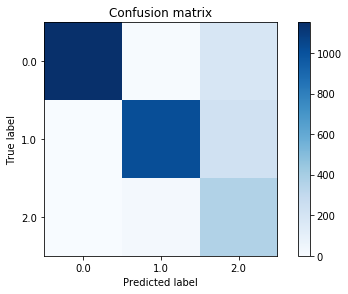


---------------------------------------------------------
Distortion:  0.05                    Accuracy:   0.8499327052489906
Confusion matrix
[[1144    4  174]
 [   6 1019  239]
 [   2   21  363]]


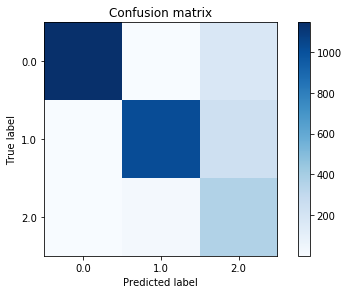


---------------------------------------------------------
Distortion:  0.1                    Accuracy:   0.8408479138627187
Confusion matrix
[[1114    3  162]
 [  32 1015  244]
 [   6   26  370]]


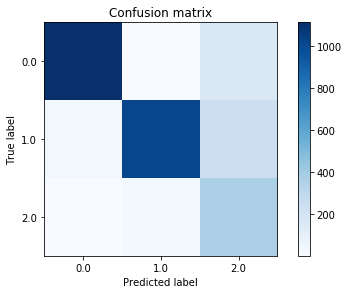


---------------------------------------------------------
Distortion:  0.15                    Accuracy:   0.8142664872139973
Confusion matrix
[[1036    7  145]
 [  98 1013  260]
 [  18   24  371]]


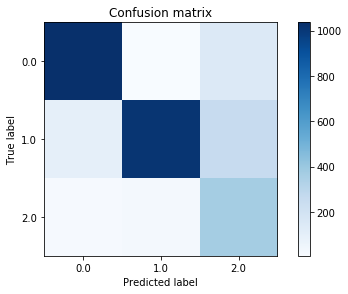


---------------------------------------------------------
Distortion:  0.2                    Accuracy:   0.7823014804845222
Confusion matrix
[[ 948    6  148]
 [ 175 1004  255]
 [  29   34  373]]


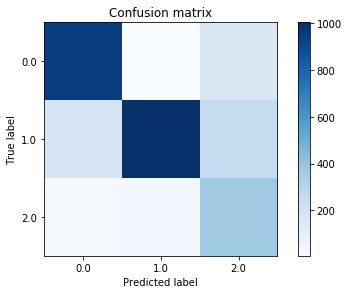


---------------------------------------------------------
Distortion:  0.25                    Accuracy:   0.7496635262449529
Confusion matrix
[[ 819    6  118]
 [ 263 1004  253]
 [  70   34  405]]


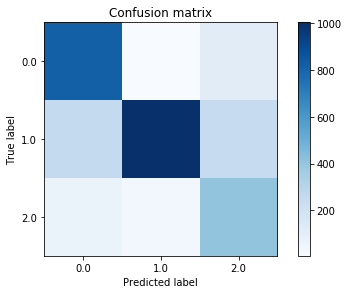


---------------------------------------------------------
Distortion:  0.3                    Accuracy:   0.705585464333782
Confusion matrix
[[715   9 100]
 [323 987 281]
 [114  48 395]]


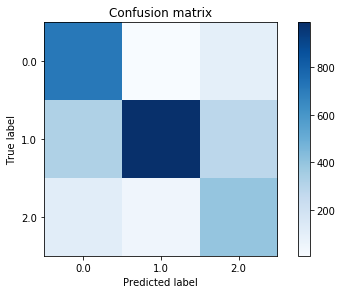


---------------------------------------------------------
Distortion:  0.35                    Accuracy:   0.6635262449528937
Confusion matrix
[[572   3 103]
 [388 987 260]
 [192  54 413]]


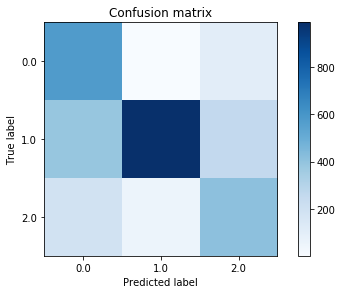


---------------------------------------------------------
Distortion:  0.4                    Accuracy:   0.626514131897712
Confusion matrix
[[473   7  87]
 [446 965 265]
 [233  72 424]]


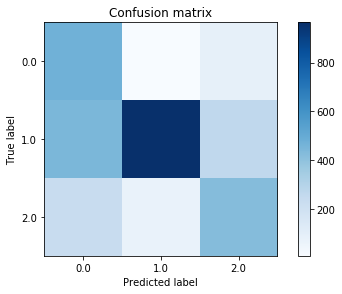


---------------------------------------------------------
Breakdown Distortion:  0.3066400000000001


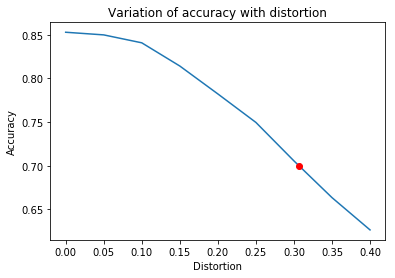

In [0]:
model.insert(6,model6)model6
create_dist(test_images_h6,test_label_h6,6)

#Multiclass of 235
*Model 7*

In [0]:
train_no=17510
test_no=2722
train_images_h7=np.empty([train_no,28,28])
test_images_h7=np.empty([test_no,28,28])
train_label_h7=np.empty([train_no,])
test_label_h7=np.empty([test_no,])

In [0]:
j=0
for i in range(60000):
  if train_label[i]==2:   
    train_label_h7[j]=0
    train_images_h7[j]=train_images[i]
    j=j+1
  elif train_label[i]==3:
    train_label_h7[j]=1
    train_images_h7[j]=train_images[i]
    j=j+1
  elif  train_label[i]==5:
    train_label_h7[j]=2
    train_images_h7[j]=train_images[i]
    j=j+1
print(j)    
j=0
for i in range(10000):
  if test_label[i]==2:   
    test_label_h7[j]=0
    test_images_h7[j]=test_images[i]
    j=j+1
  elif test_label[i]==3:
    test_label_h7[j]=1
    test_images_h7[j]=test_images[i]
    j=j+1
  elif  train_label[i]==5:
    test_label_h7[j]=2
    test_images_h7[j]=test_images[i]
    j=j+1
print(j)

17510
2722


In [0]:
model7 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(3, activation=tf.nn.softmax)
])
model7.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
model7.fit(train_images_h7, train_label_h7, epochs=5)

Epoch 1/5
17510/17510 [==============================] - 1s 69us/sample - loss: 0.1480 - acc: 0.9485
Epoch 2/5
17510/17510 [==============================] - 1s 67us/sample - loss: 0.0596 - acc: 0.9798
Epoch 3/5
17510/17510 [==============================] - 1s 66us/sample - loss: 0.0346 - acc: 0.9890
Epoch 4/5
17510/17510 [==============================] - 1s 66us/sample - loss: 0.0216 - acc: 0.9934
Epoch 5/5
17510/17510 [==============================] - 1s 65us/sample - loss: 0.0156 - acc: 0.9948


In [0]:
test_loss, test_acc = model7.evaluate(test_images_h7, test_label_h7)
print('Test accuracy:', test_acc)

2722/2722 [==============================] - 0s 56us/sample - loss: 0.9651 - acc: 0.8200
Test accuracy: 0.81998533


Distortion:  0                    Accuracy:   0.8199853049228508
Confusion matrix
[[1028    5  241]
 [   4  992  227]
 [   0   13  212]]


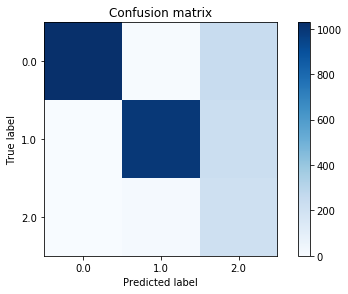


---------------------------------------------------------
Distortion:  0.01                    Accuracy:   0.8174136664217487
Confusion matrix
[[1025    5  247]
 [   4  991  224]
 [   3   14  209]]


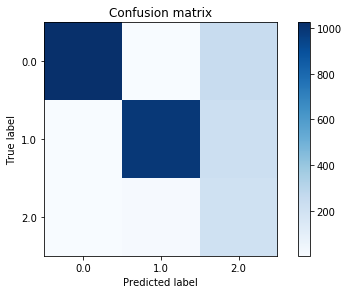


---------------------------------------------------------
Distortion:  0.05                    Accuracy:   0.8089639970609845
Confusion matrix
[[1025    9  279]
 [   6  975  199]
 [   1   26  202]]


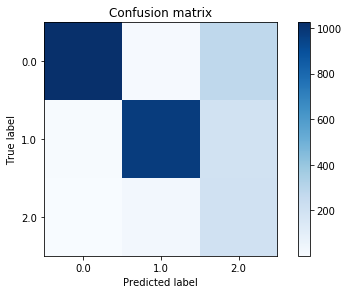


---------------------------------------------------------
Distortion:  0.1                    Accuracy:   0.804922850844967
Confusion matrix
[[1026   16  308]
 [   3  964  171]
 [   3   30  201]]


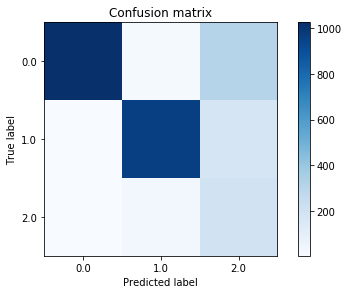


---------------------------------------------------------
Distortion:  0.15                    Accuracy:   0.7939015429831007
Confusion matrix
[[1026   32  349]
 [   4  940  136]
 [   2   38  195]]


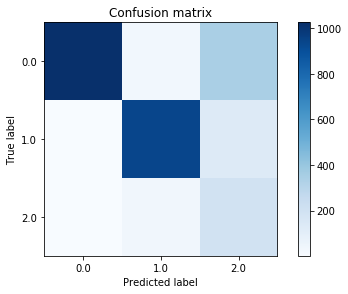


---------------------------------------------------------
Distortion:  0.2                    Accuracy:   0.7700220426157237
Confusion matrix
[[1023   63  384]
 [   7  880  103]
 [   2   67  193]]


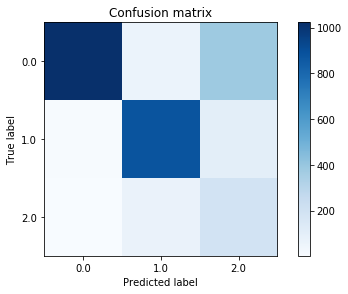


---------------------------------------------------------
Distortion:  0.25                    Accuracy:   0.7406318883174137
Confusion matrix
[[1020  123  401]
 [   8  807   90]
 [   4   80  189]]


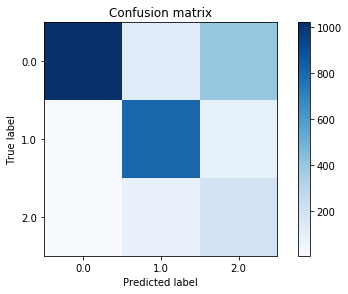


---------------------------------------------------------
Distortion:  0.3                    Accuracy:   0.6972814107274063
Confusion matrix
[[1013  170  422]
 [  13  695   68]
 [   6  145  190]]


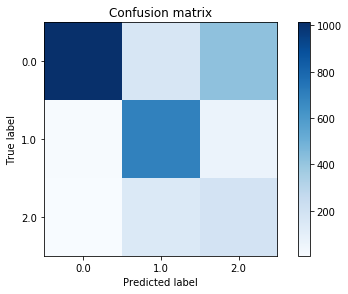


---------------------------------------------------------
Distortion:  0.35                    Accuracy:   0.6403379867744305
Confusion matrix
[[1010  232  480]
 [  15  579   46]
 [   7  199  154]]


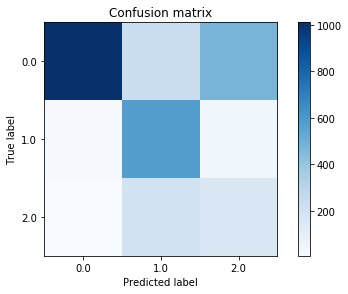


---------------------------------------------------------
Distortion:  0.4                    Accuracy:   0.6127847171197649
Confusion matrix
[[1012  300  470]
 [   6  481   35]
 [  14  229  175]]


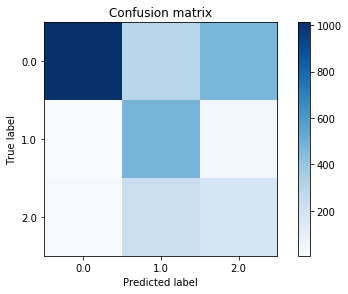


---------------------------------------------------------
Distortion:  0.7                    Accuracy:   0.4180749448934607
Confusion matrix
[[966 651 529]
 [  3  22   1]
 [ 63 337 150]]


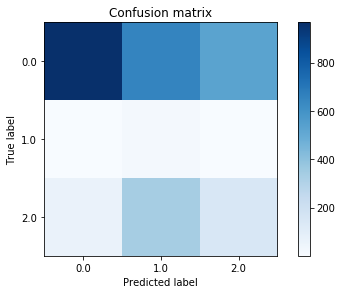


---------------------------------------------------------
Distortion:  1                    Accuracy:   0.3552534900808229
Confusion matrix
[[816 767 529]
 [  0   0   0]
 [216 243 151]]


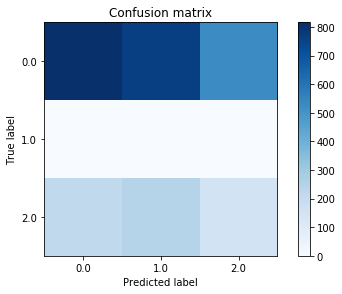


---------------------------------------------------------
Breakdown Distortion:  0.2968644067796611


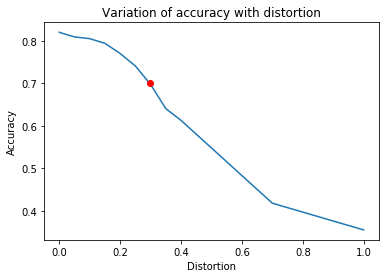

In [0]:
model.insert(7,model7)
create_dist(test_images_h7,test_label_h7,7)

#Final Compilation

The function predict_for predicts the value of kth test image in hierarchical manner

In [0]:
def predict_for_one(k):
  if model1.predict(test_images[k-1:k])[:,0]>.5:
    print("It doesn't have a circle")
    if  model5.predict(test_images[k-1:k])[:,0]>(1/2):
      print("It has straight lines")
      if model6.predict(test_images[k-1:k])[:,0]>(1/3):
        print("It is 1")
      elif model6.predict(test_images[k-1:k])[:,1]>(1/3):
        print("It is 4")
      else:
        print("It is 7")
    else:
      print("It has curves")
      if model7.predict(test_images[k-1:k])[:,0]>(1/3):
        print("It is 2")
      elif model7.predict(test_images[k-1:k])[:,1]>(1/3):
        print("It is 3")
      else:
        print("It is 5")

  else:
    print("It has a circle")
    if model2.predict(test_images[k-1:k])[:,0]>.5:
      print("It is 0 or 8")
      if model3.predict(test_images[k-1:k])[:,0]>.5:
        print("It is 0")
      else:
        print("It is 8")
    else:
      print("It is 6 or 9")
      if model4.predict(test_images[k-1:k])[:,0]>.5:
        print("It is 6")
      else:
        print("It is 9")
  print()

In [0]:
for k in range(1,9):
  predict_for_one(k)

It doesn't have a circle
It has straight lines
It is 7

It doesn't have a circle
It has curves
It is 2

It doesn't have a circle
It has straight lines
It is 1

It has a circle
It is 0 or 8
It is 0

It doesn't have a circle
It has straight lines
It is 4

It doesn't have a circle
It has straight lines
It is 1

It doesn't have a circle
It has straight lines
It is 4

It has a circle
It is 6 or 9
It is 9



for checking the accuracy

In [0]:
def predict_for(ar,k):
  if model1.predict(test_images[k-1:k])[:,0]>.5:
    if  model5.predict(test_images[k-1:k])[:,0]>(1/2):
      if model6.predict(test_images[k-1:k])[:,0]>(1/3):
        ar[k-1]=1
        
      elif model6.predict(test_images[k-1:k])[:,1]>(1/3):
        ar[k-1]=4
        
      else:
        ar[k-1]=7
        
    else:
      if model7.predict(test_images[k-1:k])[:,0]>(1/3):
        ar[k-1]=2
        
      elif model7.predict(test_images[k-1:k])[:,1]>(1/3):
        ar[k-1]=3
        
      else:
        ar[k-1]=5
        

  else:
    if model2.predict(test_images[k-1:k])[:,0]>.5:
      if model3.predict(test_images[k-1:k])[:,0]>.5:
        ar[k-1]=0
        
      else:
        ar[k-1]=8
        
    else:
      if model4.predict(test_images[k-1:k])[:,0]>.5:
        ar[k-1]=6
        
      else:
        ar[k-1]=9

In [0]:
ar=np.empty([10000])
for i in range(1,10001):
  predict_for(ar,i)

In [0]:
ar

array([7., 2., 1., ..., 4., 5., 6.])

In [0]:
accuracy_score(ar,test_label)

0.9731

#Targeted Adversaries

In [0]:
ar=(test_images!=0)

In [0]:
indexes=[]
for i in range(10000):
  indexes.insert(i, np.where(ar[i].reshape(1,784) == True)[1])

In [0]:
length=np.empty([10000])
for i in range (10000):
  length[i] = indexes[i].shape[0]

In [0]:
min(length)

44.0

In [0]:
test = test_images.reshape(10000,784)
def createdist(dist,ran=True):
  dist_images=np.empty([10000,784])
  for i in range(10000):
    for j in range(784):
      dist_images[i][j] = test[i][j]
    s = np.random.choice(indexes[i], (int)(length[i]*dist),replace=False)
    for k in s:
      dist_images[i][k]=(ran)*random.randint(0,254)/255
  return dist_images.reshape(10000,28,28)

In [0]:
distorted = np.empty([len(distortion_list),10000,28,28])
for i in range(len(distortion_list)):
  sys.stdout.write('\r')
  sys.stdout.write("[%-20s] %d%%" % ('>>'*(i+1), 10*(i+1)))
  sys.stdout.flush()
  distorted[i] = createdist(distortion_list[i])

[>>>>>>>>>>>>>>>>>>>>>>>>] 120%

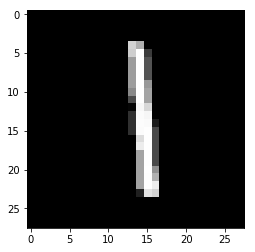

In [0]:
plt.imshow(test_images[9335],cmap='gray')

In [0]:
len(distortion_list)

12

5753


<function matplotlib.pyplot.show>

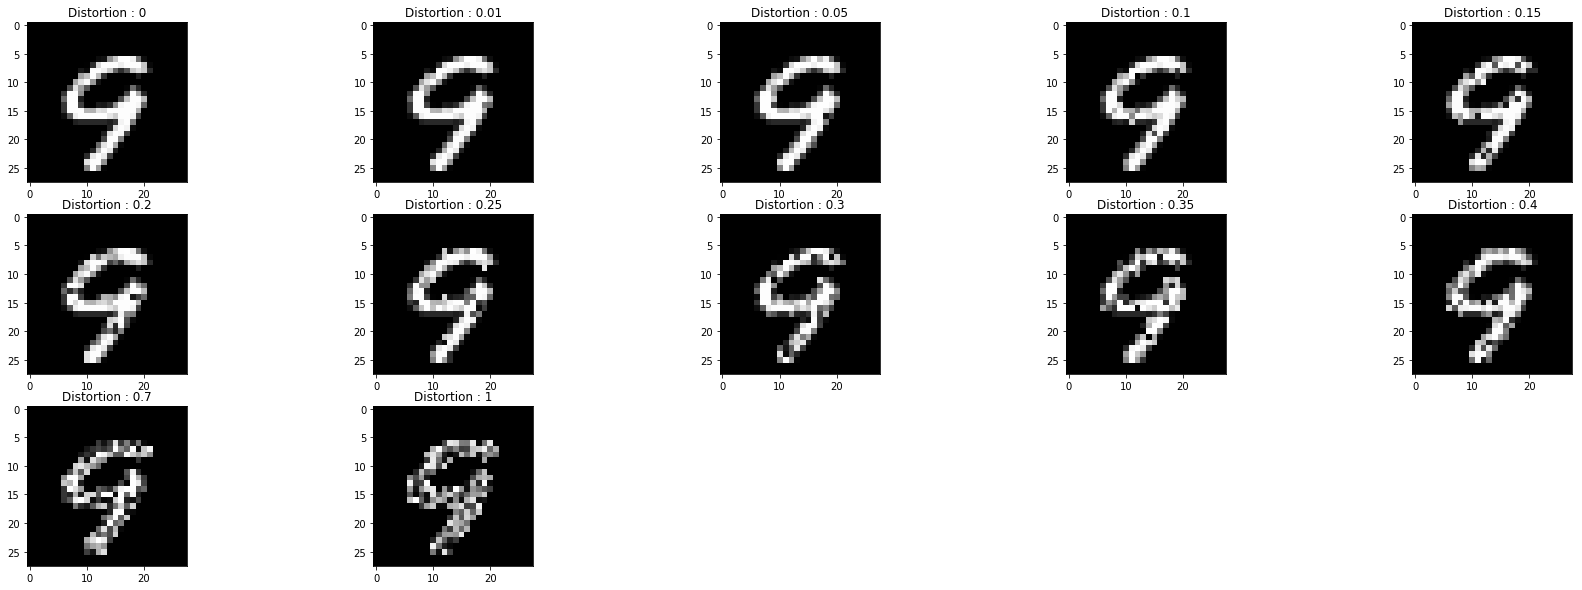

In [0]:
index = random.randint(0,9999)
print(index)
fig = plt.gcf()
fig.set_size_inches(30,10)
for i in range(len(distortion_list)):
  plt.subplot(3,5,i+1)
  plt.title("Distortion : {}".format(distortion_list[i]))
  plt.imshow(distorted[i][index],cmap='gray')
plt.show

In [0]:
distorted_blk = np.empty([len(distortion_list),10000,28,28])
for i in range(len(distortion_list)):
  sys.stdout.write('\r')
  sys.stdout.write("[%-20s] %d%%" % ('>>'*(i+1), 10*(i+1)))
  sys.stdout.flush()
  distorted_blk[i] = createdist(distortion_list[i],ran=False)

[>>>>>>>>>>>>>>>>>>>>>>>>] 120%

6619


<function matplotlib.pyplot.show>

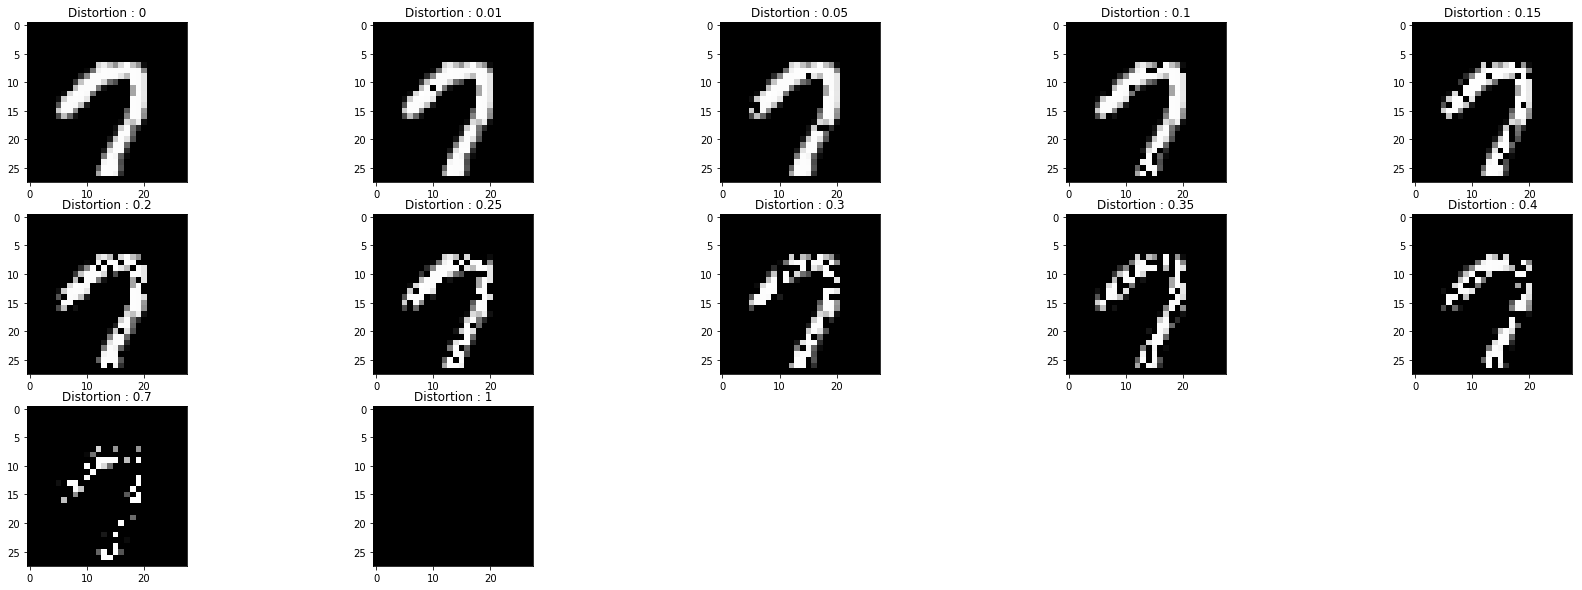

In [0]:
index = random.randint(0,9999)
print(index)
fig = plt.gcf()
fig.set_size_inches(30,10)
for i in range(len(distortion_list)):
  plt.subplot(3,5,i+1)
  plt.title("Distortion : {}".format(distortion_list[i]))
  plt.imshow(distorted_blk[i][index],cmap='gray')
plt.show

In [0]:
def predict_adv(ar,k,test_images):
  if model1.predict(test_images[k-1:k])[:,0]>.5:
    if  model5.predict(test_images[k-1:k])[:,0]>(1/2):
      if model6.predict(test_images[k-1:k])[:,0]>(1/3):
        ar[k-1]=1
        
      elif model6.predict(test_images[k-1:k])[:,1]>(1/3):
        ar[k-1]=4
        
      else:
        ar[k-1]=7
        
    else:
      if model7.predict(test_images[k-1:k])[:,0]>(1/3):
        ar[k-1]=2
        
      elif model7.predict(test_images[k-1:k])[:,1]>(1/3):
        ar[k-1]=3
        
      else:
        ar[k-1]=5
        

  else:
    if model2.predict(test_images[k-1:k])[:,0]>.5:
      if model3.predict(test_images[k-1:k])[:,0]>.5:
        ar[k-1]=0
        
      else:
        ar[k-1]=8
        
    else:
      if model4.predict(test_images[k-1:k])[:,0]>.5:
        ar[k-1]=6
        
      else:
        ar[k-1]=9

In [0]:
print("Distortion\tAccuracy")
for j in range(len(distortion_list)):
  ar=np.empty([10000])
  for i in range(1,10001):
    predict_adv(ar,i,distorted[j])
  print(distortion_list[j],"\t",accuracy_score(ar,test_label))

Distortion	Accuracy
0 	 0.9731
0.01 	 0.9733
0.05 	 0.9732
0.1 	 0.971
0.15 	 0.9703
0.2 	 0.9708
0.25 	 0.9696
0.3 	 0.9695
0.35 	 0.9662
0.4 	 0.9645
0.7 	 0.9554
1 	 0.9338


In [0]:
print("Distortion\tAccuracy")
for j in range(len(distortion_list)):
  ar=np.empty([10000])
  for i in range(1,10001):
    predict_adv(ar,i,distorted_blk[j])
  print(distortion_list[j],"\t\t",accuracy_score(ar,test_label))

Distortion	Accuracy
0 		 0.9731
0.01 		 0.9728
0.05 		 0.972
0.1 		 0.9684
0.15 		 0.965
0.2 		 0.9595
0.25 		 0.954
0.3 		 0.9478
0.35 		 0.9351
0.4 		 0.923
0.7 		 0.7473
1 		 0.1032


#Box Targeted

In [0]:
xstart = 5
xend = 23
ystart = 5
yend = 23
distortion=0.5
distortion_list = [0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4]
print("Maximum Distortion that can be provided is: {:0.2f}".format((xend-xstart)*(yend-ystart)/784))

Maximum Distortion that can be provided is: 0.41


In [0]:
def boxdis(test_img,test_lbl,distortion):
  xchoice = np.arange(xstart,xend)
  ychoice = np.arange(ystart,yend)
  test = np.empty([test_lbl.shape[0],28,28])
  for i in range(test_lbl.shape[0]):
    for j in range(28):
      for k in range(28):
        test[i][j][k] = test_img[i][j][k]
  for i in range(test_lbl.shape[0]):
    s = np.random.choice(xchoice, (int)((28)*distortion),replace=False)
    d = np.random.choice(ychoice, (int)((28)*distortion),replace=False)
    for j in s:
      j=int(j)
      for k in d:
        test[i][j][k] = random.randint(0,254)/255
  return test

In [0]:
box_img = np.empty([len(distortion_list),10000,28,28])
for i in range(len(distortion_list)):
  sys.stdout.write('\r')
  sys.stdout.write("[%-20s] %d%%" % ('>>'*(i+1), 10*(i+1)))
  sys.stdout.flush()
  box_img[i] = boxdis(test_images,test_label,distortion_list[i])

[>>>>>>>>>>>>>>>>>>  ] 90%

7319


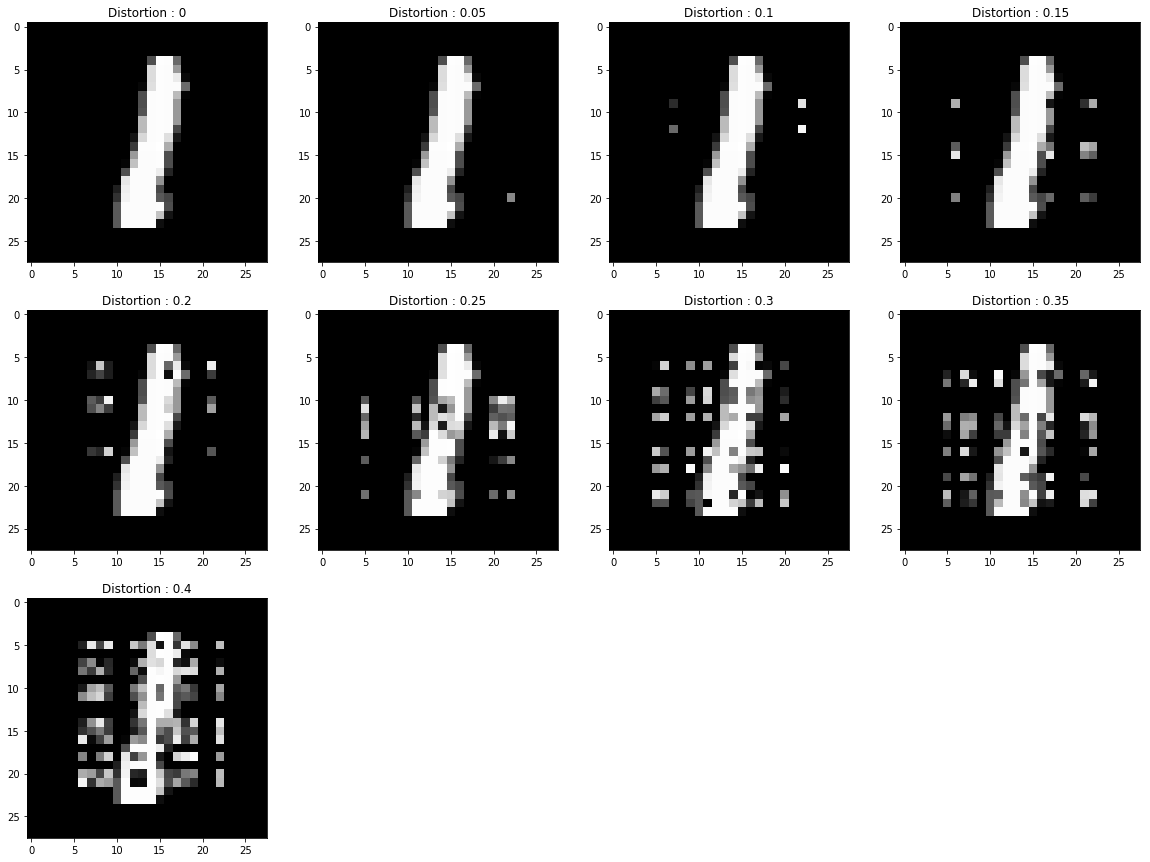

In [0]:
index=random.randint(0,9999)
print(index)
for i in range(len(distortion_list)):
  fig = plt.gcf()
  fig.set_size_inches(20,15)
  plt.subplot(3,4,i+1)
  plt.title("Distortion : {}".format(distortion_list[i]))
  plt.imshow(box_img[i][index],cmap = 'gray')

Model1

Distortion:  0                    Accuracy:   0.9846
Confusion matrix
[[5997   72]
 [  82 3849]]


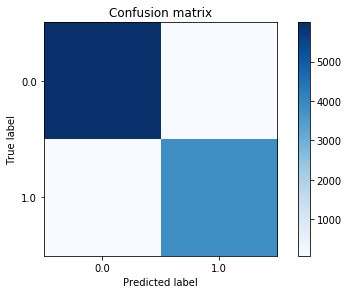


---------------------------------------------------------
Distortion:  0.05                    Accuracy:   0.9729
Confusion matrix
[[5949  141]
 [ 130 3780]]


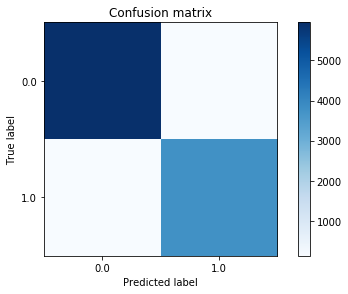


---------------------------------------------------------
Distortion:  0.1                    Accuracy:   0.947
Confusion matrix
[[5834  285]
 [ 245 3636]]


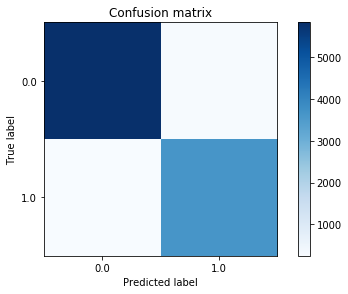


---------------------------------------------------------
Distortion:  0.15                    Accuracy:   0.9059
Confusion matrix
[[5673  535]
 [ 406 3386]]


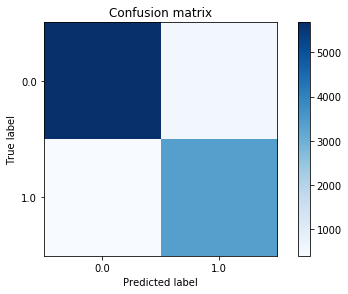


---------------------------------------------------------
Distortion:  0.2                    Accuracy:   0.859
Confusion matrix
[[5517  848]
 [ 562 3073]]


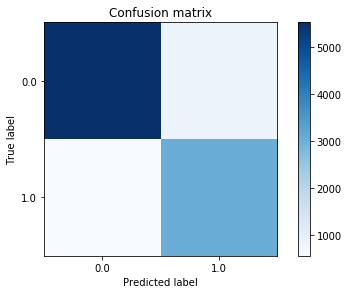


---------------------------------------------------------
Distortion:  0.25                    Accuracy:   0.8056
Confusion matrix
[[5420 1285]
 [ 659 2636]]


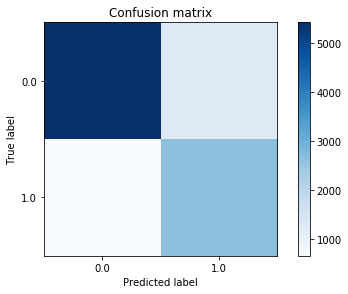


---------------------------------------------------------
Distortion:  0.3                    Accuracy:   0.7601
Confusion matrix
[[5405 1725]
 [ 674 2196]]


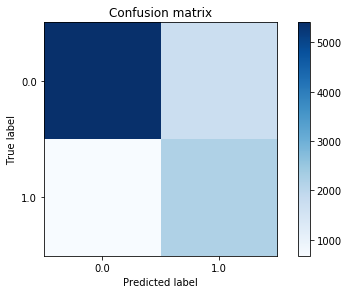


---------------------------------------------------------
Distortion:  0.35                    Accuracy:   0.7201
Confusion matrix
[[5464 2184]
 [ 615 1737]]


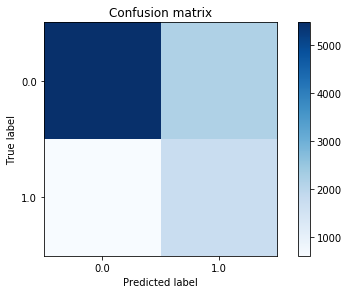


---------------------------------------------------------
Distortion:  0.4                    Accuracy:   0.6853
Confusion matrix
[[5545 2613]
 [ 534 1308]]


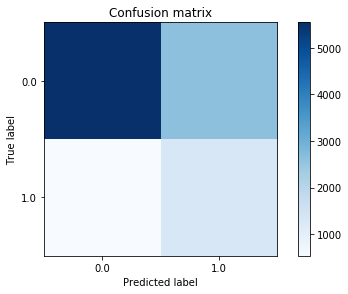


---------------------------------------------------------
Breakdown Distortion:  0.37887931034482764


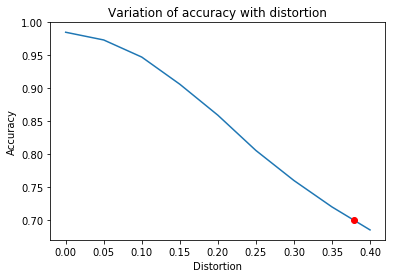

In [0]:
model.insert(1,model1)
create_dist(test_images,test_label_h1,1,box=True)

Model2

Distortion:  0                    Accuracy:   0.9903085947462382
Confusion matrix
[[1942   26]
 [  12 1941]]


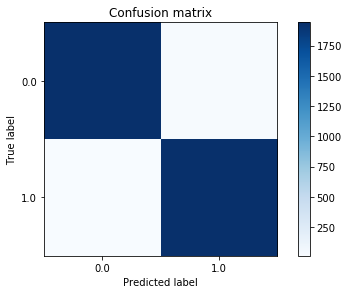


---------------------------------------------------------
Distortion:  0.05                    Accuracy:   0.9869931140015302
Confusion matrix
[[1924   21]
 [  30 1946]]


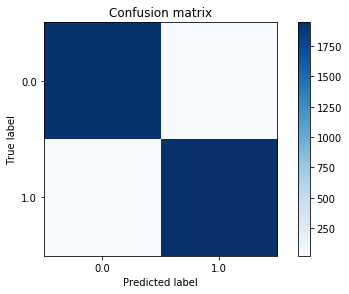


---------------------------------------------------------
Distortion:  0.1                    Accuracy:   0.9722009691405253
Confusion matrix
[[1858   13]
 [  96 1954]]


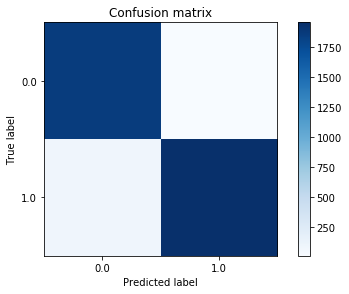


---------------------------------------------------------
Distortion:  0.15                    Accuracy:   0.944912012241775
Confusion matrix
[[1749   11]
 [ 205 1956]]


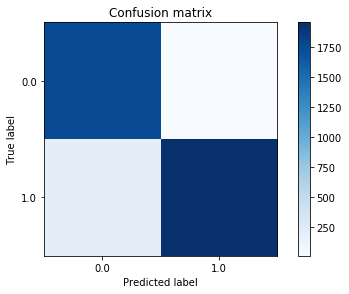


---------------------------------------------------------
Distortion:  0.2                    Accuracy:   0.9010456516194848
Confusion matrix
[[1576   10]
 [ 378 1957]]


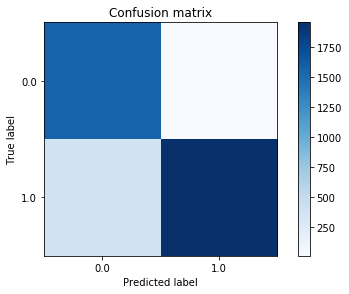


---------------------------------------------------------
Distortion:  0.25                    Accuracy:   0.8337158888038766
Confusion matrix
[[1313   11]
 [ 641 1956]]


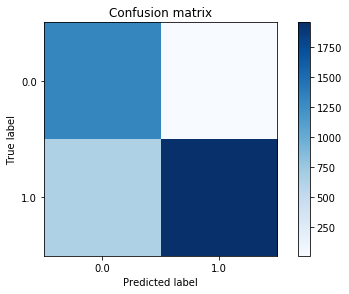


---------------------------------------------------------
Distortion:  0.3                    Accuracy:   0.7697016067329763
Confusion matrix
[[1065   14]
 [ 889 1953]]


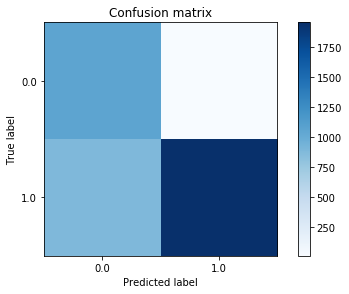


---------------------------------------------------------
Distortion:  0.35                    Accuracy:   0.7049222137209895
Confusion matrix
[[ 808   11]
 [1146 1956]]


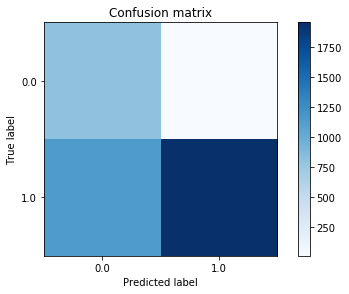


---------------------------------------------------------
Distortion:  0.4                    Accuracy:   0.6342769701606733
Confusion matrix
[[ 526    6]
 [1428 1961]]


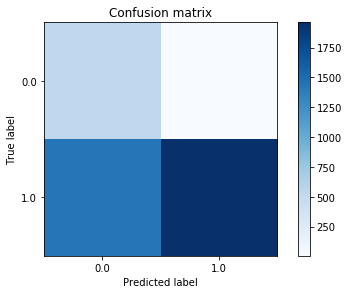


---------------------------------------------------------
Breakdown Distortion:  0.35348375451263536


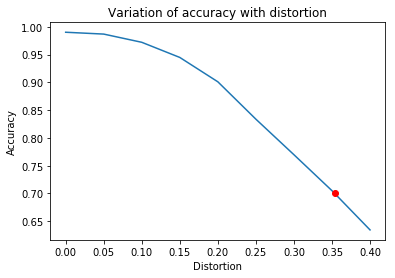

In [0]:
model.insert(2,model2)
create_dist(test_images_h2,test_label_h2,2,box=True)

Model3

Distortion:  0                    Accuracy:   0.9948822927328557
Confusion matrix
[[976   6]
 [  4 968]]


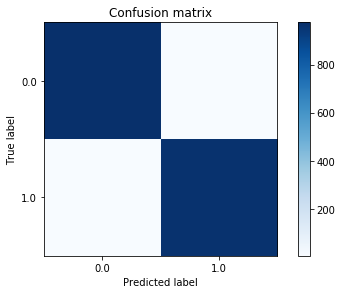


---------------------------------------------------------
Distortion:  0.05                    Accuracy:   0.9959058341862845
Confusion matrix
[[976   4]
 [  4 970]]


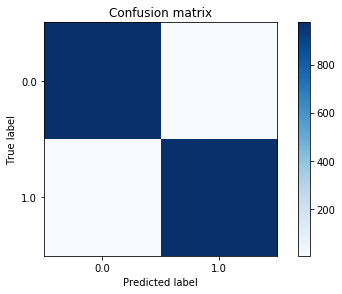


---------------------------------------------------------
Distortion:  0.1                    Accuracy:   0.9938587512794268
Confusion matrix
[[974   6]
 [  6 968]]


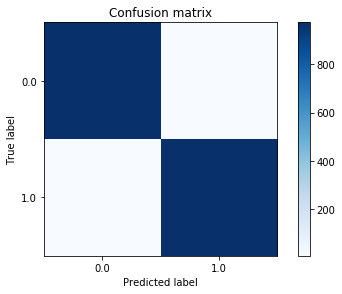


---------------------------------------------------------
Distortion:  0.15                    Accuracy:   0.9933469805527124
Confusion matrix
[[969   2]
 [ 11 972]]


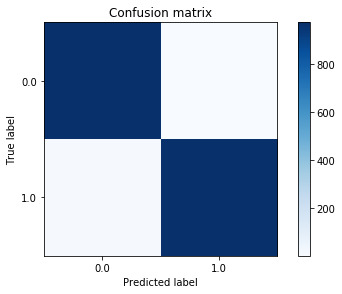


---------------------------------------------------------
Distortion:  0.2                    Accuracy:   0.9872057318321392
Confusion matrix
[[959   4]
 [ 21 970]]


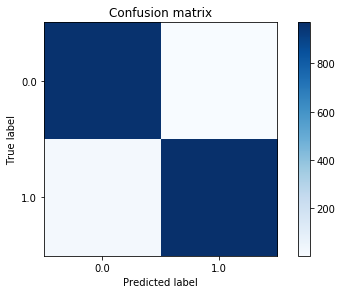


---------------------------------------------------------
Distortion:  0.25                    Accuracy:   0.9820880245649949
Confusion matrix
[[945   0]
 [ 35 974]]


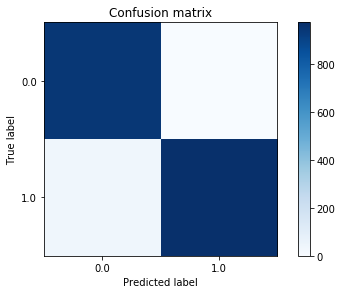


---------------------------------------------------------
Distortion:  0.3                    Accuracy:   0.962128966223132
Confusion matrix
[[908   2]
 [ 72 972]]


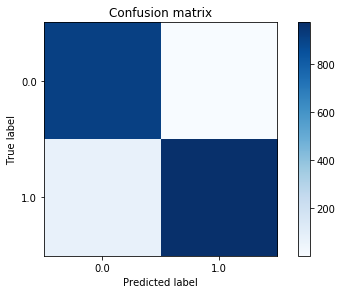


---------------------------------------------------------
Distortion:  0.35                    Accuracy:   0.9390992835209826
Confusion matrix
[[863   2]
 [117 972]]


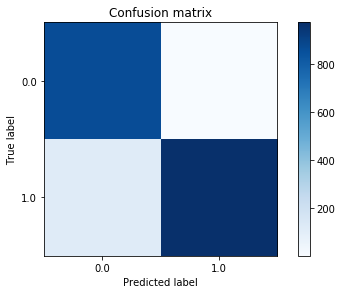


---------------------------------------------------------
Distortion:  0.4                    Accuracy:   0.9058341862845445
Confusion matrix
[[798   2]
 [182 972]]


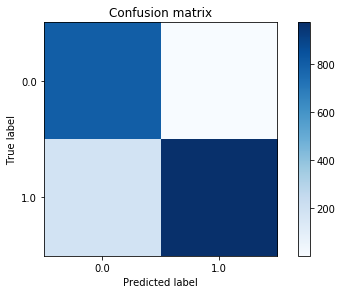


---------------------------------------------------------
Accuracy didn't fall below 70.0%


In [0]:
model.insert(3,model3)
create_dist(test_images_h3,test_label_h3,3,box=True)

Model4

Distortion:  0                    Accuracy:   0.9974580579562786
Confusion matrix
[[ 955    2]
 [   3 1007]]


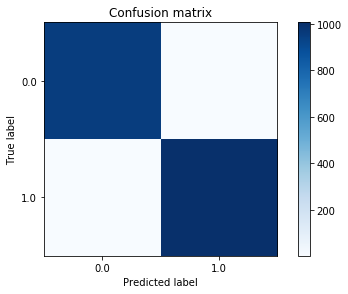


---------------------------------------------------------
Distortion:  0.05                    Accuracy:   0.99644128113879
Confusion matrix
[[ 953    2]
 [   5 1007]]


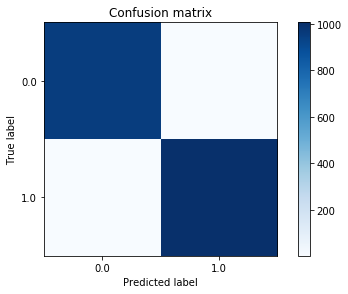


---------------------------------------------------------
Distortion:  0.1                    Accuracy:   0.99644128113879
Confusion matrix
[[ 954    3]
 [   4 1006]]


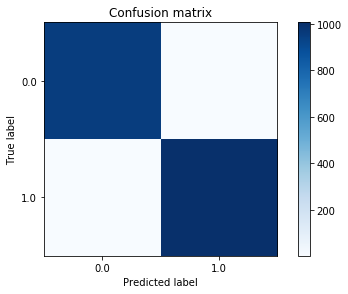


---------------------------------------------------------
Distortion:  0.15                    Accuracy:   0.9949161159125572
Confusion matrix
[[ 954    6]
 [   4 1003]]


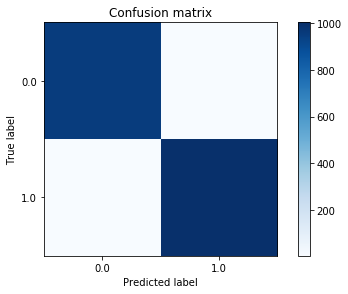


---------------------------------------------------------
Distortion:  0.2                    Accuracy:   0.9913573970513472
Confusion matrix
[[ 949    8]
 [   9 1001]]


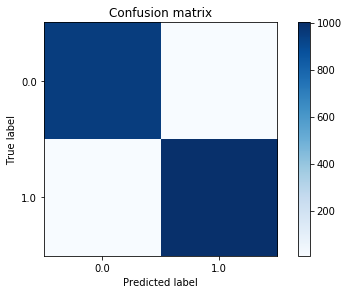


---------------------------------------------------------
Distortion:  0.25                    Accuracy:   0.9888154550076258
Confusion matrix
[[953  17]
 [  5 992]]


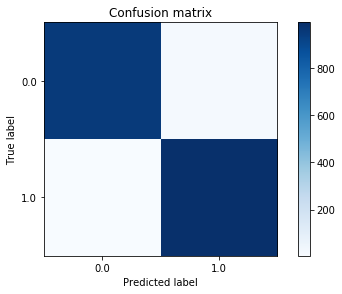


---------------------------------------------------------
Distortion:  0.3                    Accuracy:   0.9811896288764617
Confusion matrix
[[946  25]
 [ 12 984]]


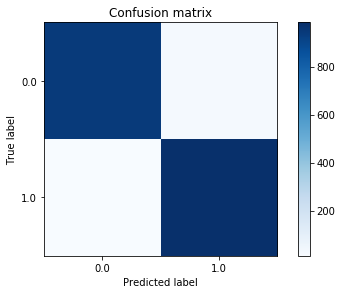


---------------------------------------------------------
Distortion:  0.35                    Accuracy:   0.9786476868327402
Confusion matrix
[[950  34]
 [  8 975]]


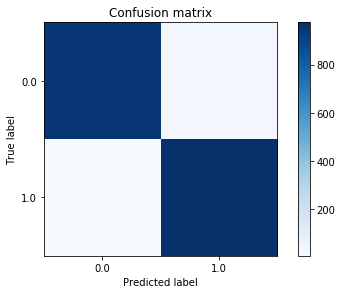


---------------------------------------------------------
Distortion:  0.4                    Accuracy:   0.9588205388917133
Confusion matrix
[[944  67]
 [ 14 942]]


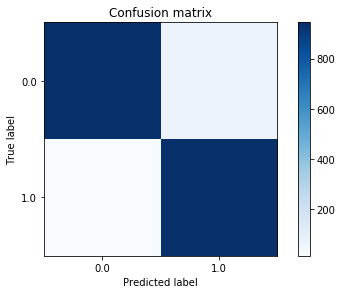


---------------------------------------------------------
Accuracy didn't fall below 70.0%


In [0]:
model.insert(4,model4)
create_dist(test_images_h4,test_label_h4,4,box=True)

Model5

Distortion:  0                    Accuracy:   0.9924329659483467
Confusion matrix
[[3119   20]
 [  26 2914]]


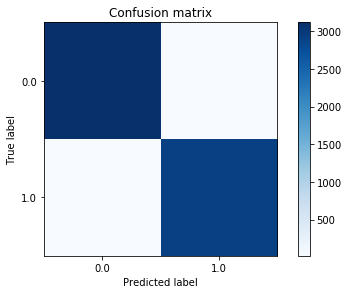


---------------------------------------------------------
Distortion:  0.05                    Accuracy:   0.9802599111696003
Confusion matrix
[[3037   12]
 [ 108 2922]]


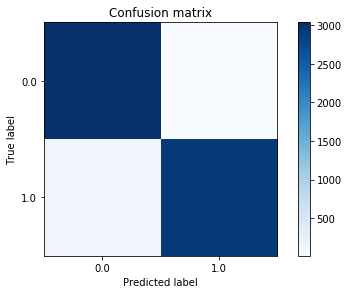


---------------------------------------------------------
Distortion:  0.1                    Accuracy:   0.9121566047047212
Confusion matrix
[[2624   13]
 [ 521 2921]]


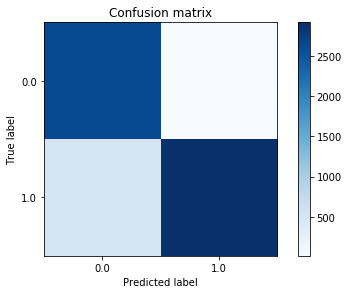


---------------------------------------------------------
Distortion:  0.15                    Accuracy:   0.8072051324230959
Confusion matrix
[[1980    7]
 [1165 2927]]


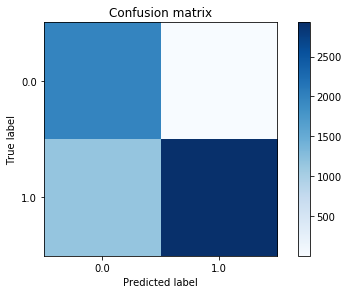


---------------------------------------------------------
Distortion:  0.2                    Accuracy:   0.7198552393485771
Confusion matrix
[[1450    8]
 [1695 2926]]


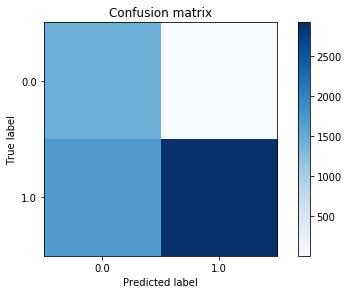


---------------------------------------------------------
Distortion:  0.25                    Accuracy:   0.6626089817404178
Confusion matrix
[[1100    6]
 [2045 2928]]


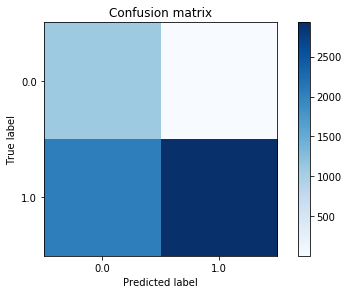


---------------------------------------------------------
Distortion:  0.3                    Accuracy:   0.6102977463398586
Confusion matrix
[[ 782    6]
 [2363 2928]]


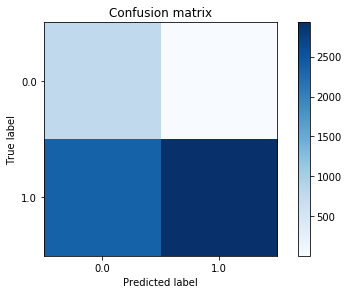


---------------------------------------------------------
Distortion:  0.35                    Accuracy:   0.5749300871853923
Confusion matrix
[[ 567    6]
 [2578 2928]]


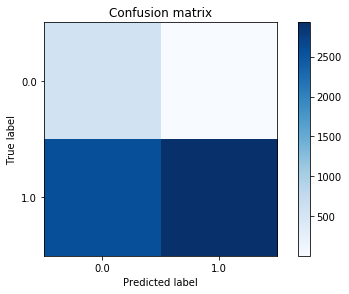


---------------------------------------------------------
Distortion:  0.4                    Accuracy:   0.5481164665240994
Confusion matrix
[[ 404    6]
 [2741 2928]]


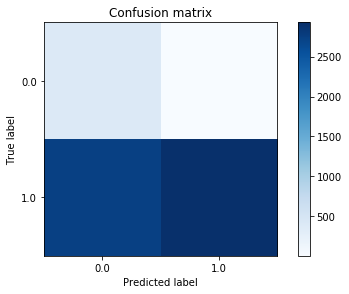


---------------------------------------------------------
Breakdown Distortion:  0.21734195402298856


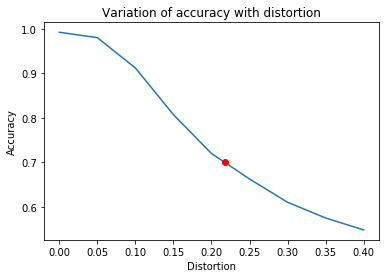

In [0]:
model.insert(5,model5)
create_dist(test_images_h5,test_label_h5,5,box=True)

Model6

Distortion:  0                    Accuracy:   0.8489232839838493
Confusion matrix
[[1131    0  140]
 [   2  980  303]
 [   2    2  412]]


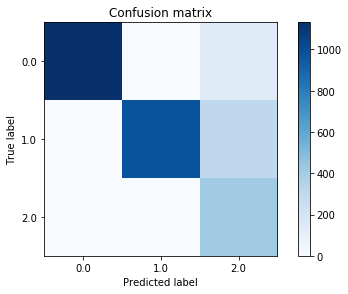


---------------------------------------------------------
Distortion:  0.05                    Accuracy:   0.8458950201884253
Confusion matrix
[[1117    0  129]
 [   4  974  303]
 [  14    8  423]]


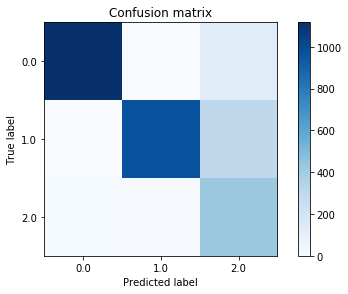


---------------------------------------------------------
Distortion:  0.1                    Accuracy:   0.8378196500672948
Confusion matrix
[[1092    0  118]
 [   3  973  312]
 [  40    9  425]]


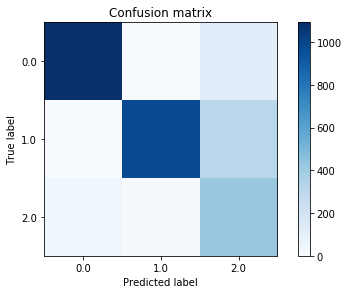


---------------------------------------------------------
Distortion:  0.15                    Accuracy:   0.8294078061911171
Confusion matrix
[[1042    0  112]
 [   4  969  289]
 [  89   13  454]]


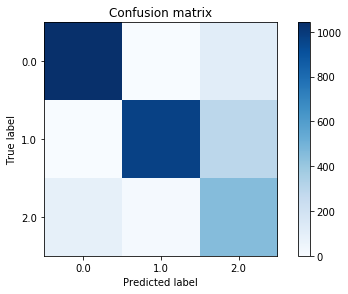


---------------------------------------------------------
Distortion:  0.2                    Accuracy:   0.7903768506056528
Confusion matrix
[[933   0  95]
 [ 18 941 285]
 [184  41 475]]


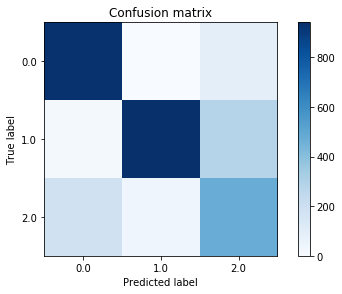


---------------------------------------------------------
Distortion:  0.25                    Accuracy:   0.7473082099596231
Confusion matrix
[[830   0 106]
 [ 22 926 284]
 [283  56 465]]


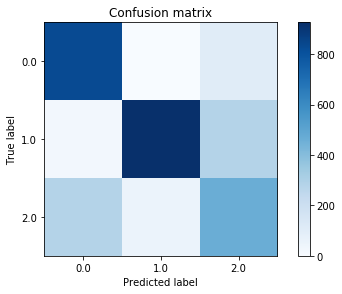


---------------------------------------------------------
Distortion:  0.3                    Accuracy:   0.7176985195154778
Confusion matrix
[[735   1  88]
 [ 33 914 283]
 [367  67 484]]


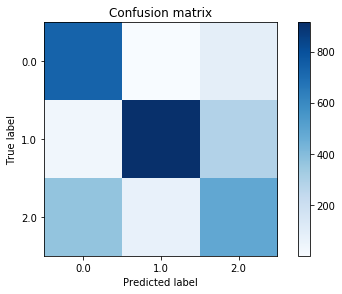


---------------------------------------------------------
Distortion:  0.35                    Accuracy:   0.6722745625841184
Confusion matrix
[[624   1  82]
 [ 73 871 270]
 [438 110 503]]


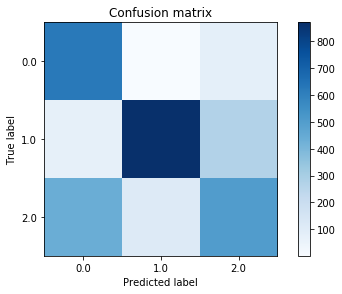


---------------------------------------------------------
Distortion:  0.4                    Accuracy:   0.6248317631224765
Confusion matrix
[[493   1  72]
 [ 94 839 258]
 [548 142 525]]


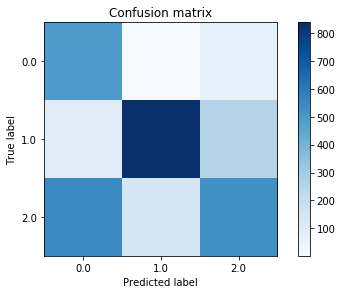


---------------------------------------------------------
Breakdown Distortion:  0.31948148148148153


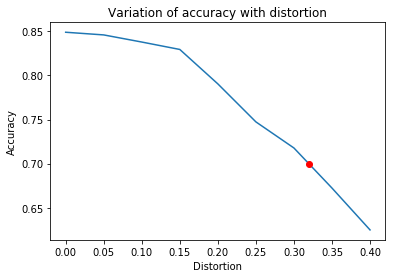

In [0]:
model.insert(6,model6)
create_dist(test_images_h6,test_label_h6,6,box=True)

Model7

Distortion:  0                    Accuracy:   0.8199853049228508
Confusion matrix
[[1028    5  241]
 [   4  992  227]
 [   0   13  212]]


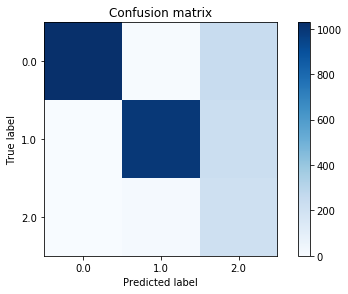


---------------------------------------------------------
Distortion:  0.05                    Accuracy:   0.8104335047759
Confusion matrix
[[1028    9  275]
 [   3  976  203]
 [   1   25  202]]


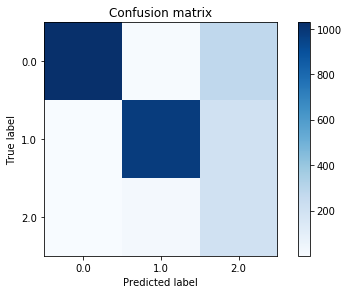


---------------------------------------------------------
Distortion:  0.1                    Accuracy:   0.7983100661278472
Confusion matrix
[[1027   26  321]
 [   3  945  158]
 [   2   39  201]]


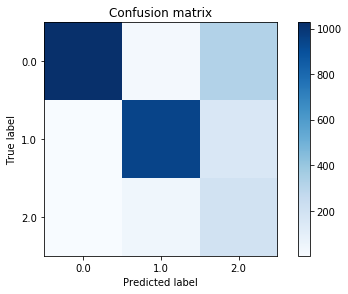


---------------------------------------------------------
Distortion:  0.15                    Accuracy:   0.7913299044819986
Confusion matrix
[[1021   36  339]
 [  10  927  135]
 [   1   47  206]]


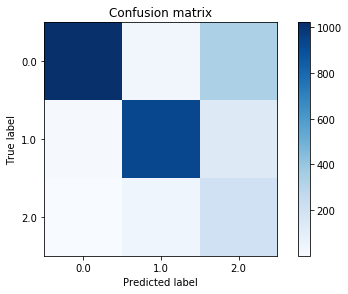


---------------------------------------------------------
Distortion:  0.2                    Accuracy:   0.7762674504041146
Confusion matrix
[[1022   70  363]
 [   9  885  111]
 [   1   55  206]]


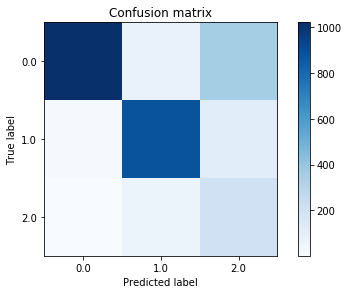


---------------------------------------------------------
Distortion:  0.25                    Accuracy:   0.7413666421748715
Confusion matrix
[[1018  108  418]
 [   7  815   77]
 [   7   87  185]]


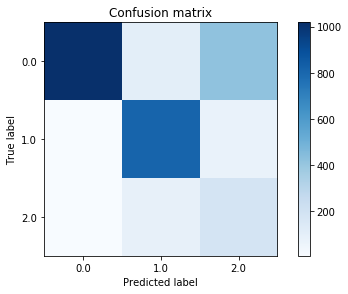


---------------------------------------------------------
Distortion:  0.3                    Accuracy:   0.6991182953710507
Confusion matrix
[[1019  162  435]
 [   9  705   66]
 [   4  143  179]]


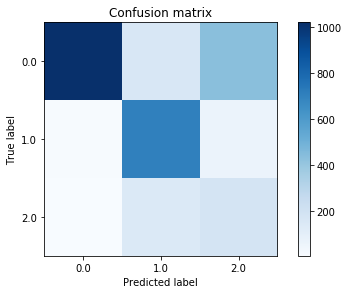


---------------------------------------------------------
Distortion:  0.35                    Accuracy:   0.6572373254959588
Confusion matrix
[[1016  221  466]
 [   9  597   38]
 [   7  192  176]]


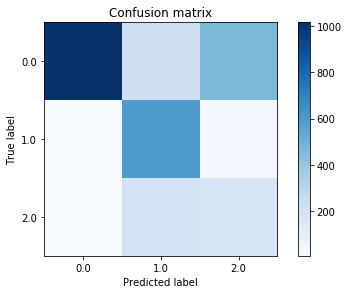


---------------------------------------------------------
Distortion:  0.4                    Accuracy:   0.5966201322556943
Confusion matrix
[[1010  310  480]
 [  10  448   34]
 [  12  252  166]]


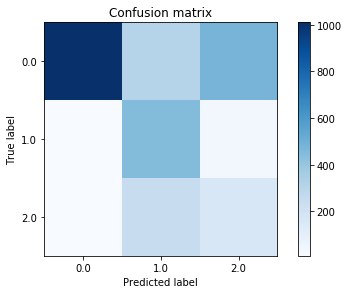


---------------------------------------------------------
Breakdown Distortion:  0.29895652173913057


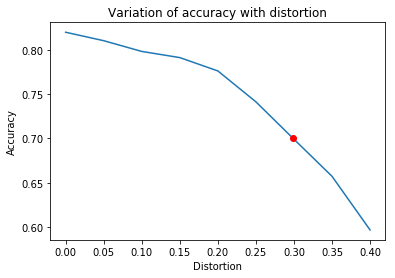

In [0]:
model.insert(7,model7)
create_dist(test_images_h7,test_label_h7,7,box=True)

#Extras

Not reqd:

```
  test = np.empty([test_label.shape[0],28,28])
  for i in range(test_label.shape[0]):
    for j in range(28):
      for k in range(28):
        test[i][j][k] = test_images[i][j][k]
  for i in range(10000):
    s = np.random.choice(784, (int)(784*distortion),replace=False)
    d = s%28
    s = (s-d)/28
    for j,k in zip(s,d):
      j=int(j)
      test[i][j][k] = random.randint(0,254)/255
```



In [0]:
def Hdistort(test,distortion,i):
  dist_test=np.empty([784])
  for j in range(784):
    dist_test[j]=test[i][j]
  s = np.random.choice(784, (int)(784*distortion),replace=False)
  for k in s:
    dist_test[k]=random.randint(0,254)/255
  return dist_test.reshape(1,28,28)

def create_dist(test_images,test_lbl,model_no, box = False):
  dist_test = np.empty([test_lbl.shape[0],28,28])
  acc = []
  
  test = np.empty([test_lbl.shape[0],28,28])
  for i in range(test_lbl.shape[0]):
    for j in range(28):
      for k in range(28):
        test[i][j][k]=test_images[i][j][k]
  test = test.reshape(test_lbl.shape[0],784)
  
  for j,distortion in enumerate(distortion_list):
    dist_test = np.empty([test_lbl.shape[0],28,28])
    for i in range(test_lbl.shape[0]):
      dist_test[i] = Hdistort(test,distortion,i)
    pred = np.argmax(model[model_no].predict(dist_test),axis=1)
    test_acc = accuracy_score(pred,test_lbl)
    acc.insert(j,test_acc)
    print("Distortion: ",distortion,"                  ","Accuracy:  ",test_acc)
    colourmat(pred,test_lbl)
    print()
    print("---------------------------------------------------------")
  if (acc[len(distortion_list)-1]<breakdown_acc):
    plotgraph(acc,distortion_list)
  else:
    print("Accuracy didn't fall below {}%".format(breakdown_acc*100))